## Telecom Churn

# Goal of Case Study
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.In this project, we have to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Approach
* Understand the DataSet
* Do EDA try to get Key Insights of DataSet 
* Identify the high value customers
* Then identify customers on the basis of usage based conversion
* Understand the behaviour of customers on the basis of good time period, action period and churn period
* Build the models using various Machine learning Algorithms and find out the best model

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_telecom = pd.read_csv("telecom_churn_data.csv")

In [24]:
df_telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [25]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [26]:
list(df_telecom.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [27]:
df_6 = df_telecom.filter(like='_6', axis=1).fillna(0)

In [28]:
df_6['total_rech_dur'] = pd.to_datetime(df_6['last_date_of_month_6']).dt.day - pd.to_datetime(df_6['date_of_last_rech_6']).dt.day

In [29]:
df_6.T

,0,1,2,3,4,5,6,7,8,9,...,99989,99990,99991,99992,99993,99994,99995,99996,99997,99998
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,...,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
arpu_6,197.385,34.047,167.69,221.338,261.636,50.258,429.023,1069.18,378.721,119.518,...,154.687,35.793,118.065,100.073,8.44,18.471,112.201,229.187,322.991,687.065
onnet_mou_6,0,24.11,11.54,99.91,50.31,50.16,71.03,57.84,413.69,33.89,...,35.09,0,26.24,80.44,0,5.4,29.26,1.11,0,84.34
offnet_mou_6,0,15.74,143.33,123.31,76.96,19.28,262.73,453.43,94.66,63.48,...,191.36,15.73,42.23,64.08,0,15.19,100.83,21.04,0,166.46
roam_ic_mou_6,0,0,0,0,0,0,0,16.23,0,0,...,0,0,0,0,0,0,0,0,0,0
roam_og_mou_6,0,0,0,0,0,0,0,23.74,0,0,...,0,0,0,0,0,0,0,0,0,0
loc_og_t2t_mou_6,0,23.88,7.19,73.68,50.31,50.16,71.03,51.39,297.13,33.89,...,30.39,0,26.24,80.44,0,5.4,28.93,1.11,0,84.34
loc_og_t2m_mou_6,0,11.51,29.34,107.43,67.64,16.39,252.23,308.63,80.96,38.03,...,182.64,0.26,41.29,62.31,0,12.78,91.34,13.33,0,166.46
loc_og_t2f_mou_6,0,0,24.11,1.91,0,0,10.38,62.13,0,0,...,4.94,0.16,0,0,0,0,1.71,0,0,0
loc_og_t2c_mou_6,0,0,0,0,0,0,0.11,0,0,0,...,0,5.79,0,0,0,0,0,4.71,0,0


In [30]:
def to_duration(X):
    return (X['last_date_of_month_6'].dt.day - (X['date_of_last_rech_data_6'].dt.day if X['date_of_last_rech_data_6']!=0 else 0 ))
    

In [31]:
#First Two Month for cleaning 70 Percentile
columns = ['total_rech_amt_6','total_rech_amt_7']



In [32]:
 #calculating average revenue for first two months
df_telecom['avg_rech_6_7'] = (df_telecom['total_rech_amt_6'] + df_telecom['total_rech_amt_7'])/2
rech_amt_threshold  =   np.percentile(df_telecom['avg_rech_6_7'], 70)
df_telecom_HC = df_telecom.loc[(df_telecom['avg_rech_6_7'] > rech_amt_threshold)]


In [33]:
df_telecom_HC.shape

(29979, 227)

In [34]:
df_telecom_HC.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0


In [35]:
(np.sort(df_telecom.isnull().sum())/df_telecom.shape[0])*100

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.60100601,  1.01801018,  1.01801018,  1.01801018,
        1.100011  ,  1.60701607,  1.65901659,  1.76701767,  3.62

In [36]:
df_telecom_HC.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0


In [37]:
# Date features handling
col_date =   [x for x in df_telecom_HC.columns.values if 'date' in x]

In [38]:
col_date

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [39]:
df_telecom_HC[col_date] = df_telecom_HC[col_date].apply(lambda x: pd.to_datetime(x).dt.day,axis=0)

D:\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [40]:
df_telecom_HC[col_date]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
7,30,31.0,31.0,30.0,27.0,25.0,26.0,30.0,NaN,NaN,NaN,NaN
8,30,31.0,31.0,30.0,25.0,31.0,30.0,30.0,NaN,31.0,23.0,NaN
13,30,31.0,31.0,30.0,20.0,22.0,30.0,26.0,NaN,NaN,30.0,NaN
16,30,31.0,31.0,30.0,30.0,31.0,14.0,10.0,NaN,NaN,NaN,NaN
17,30,31.0,31.0,30.0,30.0,30.0,25.0,29.0,NaN,NaN,NaN,NaN
21,30,31.0,31.0,30.0,30.0,31.0,31.0,30.0,NaN,NaN,NaN,NaN
24,30,31.0,31.0,30.0,23.0,17.0,31.0,29.0,NaN,NaN,NaN,NaN
33,30,31.0,31.0,30.0,30.0,30.0,26.0,28.0,30.0,28.0,26.0,10.0
38,30,31.0,31.0,30.0,30.0,28.0,24.0,26.0,NaN,NaN,NaN,26.0
41,30,31.0,31.0,30.0,24.0,22.0,31.0,17.0,NaN,NaN,NaN,NaN


In [41]:
df_telecom_HC.fillna(0)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,7000701601,109,0.0,0.0,0.0,30,31.0,31.0,30.0,1069.180,...,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1185.0
8,7001524846,109,0.0,0.0,0.0,30,31.0,31.0,30.0,378.721,...,0.0,1.0,1.0,0.0,315,21.03,910.65,122.16,0.00,519.0
13,7002191713,109,0.0,0.0,0.0,30,31.0,31.0,30.0,492.846,...,0.0,0.0,1.0,0.0,2607,0.00,0.00,0.00,0.00,380.0
16,7000875565,109,0.0,0.0,0.0,30,31.0,31.0,30.0,430.975,...,0.0,0.0,0.0,0.0,511,0.00,2.45,21.89,0.00,459.0
17,7000187447,109,0.0,0.0,0.0,30,31.0,31.0,30.0,690.008,...,0.0,0.0,0.0,0.0,667,0.00,0.00,0.00,0.00,408.0
21,7002124215,109,0.0,0.0,0.0,30,31.0,31.0,30.0,514.453,...,0.0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,640.0
24,7001125315,109,0.0,0.0,0.0,30,31.0,31.0,30.0,422.050,...,0.0,0.0,0.0,0.0,3072,0.00,0.00,0.00,0.00,385.0
33,7000149764,109,0.0,0.0,0.0,30,31.0,31.0,30.0,977.020,...,1.0,1.0,1.0,1.0,1328,358.10,2706.83,1714.67,0.00,1932.0
38,7000815202,109,0.0,0.0,0.0,30,31.0,31.0,30.0,363.987,...,0.0,0.0,0.0,0.0,1155,0.00,0.00,0.00,0.00,528.0
41,7000721289,109,0.0,0.0,0.0,30,31.0,31.0,30.0,482.832,...,0.0,0.0,0.0,0.0,2010,0.00,0.00,0.00,0.00,503.0


In [42]:
%matplotlib inline

### Need To work 

In [43]:
#df_telecom_HC['Churn'] = df_telecom_HC['total_ic_mou_9']+df_telecom_HC['total_og_mou_9']+df_telecom_HC['vol_2g_mb_9']+df_telecom_HC['vol_3g_mb_9']

In [44]:
# Adding one extra column to the existing dataframe named "churn"

churn_cols = [ 'total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df_telecom_HC['Churn'] = df_telecom_HC[churn_cols].apply(lambda x: 0 if  x.any() else 1, axis=1)

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
no_of_churn = df_telecom_HC[df_telecom_HC["Churn"] == 1].shape[0]

print("{} number of High value customer churned out of {}".format(no_of_churn, df_telecom_HC.shape[0]))

print("Hence churn percentage = {}%".format(round(100*(no_of_churn/df_telecom_HC.shape[0]),2)))

2589 number of High value customer churned out of 29979
Hence churn percentage = 8.64%


In [46]:
df_telecom_HC = df_telecom_HC.drop(columns= churn_cols, axis=1)

In [47]:
 #df_telecom_HC.to_csv('../Data/Final_Telecom_Churn.csv' ,  index = False)

### Telecom Churn: Logistic Regression with PCA

In [54]:
Telecom = df_telecom_HC

In [55]:
Telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,7000701601,109,0.0,0.0,0.0,30,31.0,31.0,30.0,1069.180,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,30,31.0,31.0,30.0,378.721,...,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,30,31.0,31.0,30.0,492.846,...,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,30,31.0,31.0,30.0,430.975,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,30,31.0,31.0,30.0,690.008,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,0


In [56]:
Telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
count,2.997900e+04,29979.0,29865.0,29865.0,29865.0,29979.0,29948.0,29822.0,29619.0,29979.000000,...,11652.000000,11741.000000,11447.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,109.0,0.0,0.0,0.0,30.0,31.0,31.0,30.0,587.587624,...,0.889804,0.837322,0.832096,1264.158911,129.482436,135.225368,121.450911,6.554528,697.014644,0.08636
std,6.846594e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,442.848876,...,0.313147,0.369087,0.373798,975.181038,390.625027,408.218570,389.910814,48.630605,488.925223,0.28090
min,7.000000e+09,109.0,0.0,0.0,0.0,30.0,31.0,31.0,30.0,-2258.709000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,369.000000,0.00000
25%,7.000641e+09,109.0,0.0,0.0,0.0,30.0,31.0,31.0,30.0,364.352500,...,1.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.00000
50%,7.001232e+09,109.0,0.0,0.0,0.0,30.0,31.0,31.0,30.0,495.951000,...,1.000000,1.000000,1.000000,914.000000,0.000000,0.000000,0.000000,0.000000,569.000000,0.00000
75%,7.001814e+09,109.0,0.0,0.0,0.0,30.0,31.0,31.0,30.0,704.184500,...,1.000000,1.000000,1.000000,1923.500000,1.600000,2.025000,0.000000,0.000000,796.000000,0.00000
max,7.002411e+09,109.0,0.0,0.0,0.0,30.0,31.0,31.0,30.0,27731.088000,...,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000,1.00000


In [57]:
Telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,7000701601,109,0.0,0.0,0.0,30,31.0,31.0,30.0,1069.180,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,30,31.0,31.0,30.0,378.721,...,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,30,31.0,31.0,30.0,492.846,...,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,30,31.0,31.0,30.0,430.975,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,30,31.0,31.0,30.0,690.008,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,0


In [58]:
Telecom = Telecom.fillna(0)

In [59]:
Telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,7000701601,109,0.0,0.0,0.0,30,31.0,31.0,30.0,1069.180,...,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,30,31.0,31.0,30.0,378.721,...,1.0,1.0,0.0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,30,31.0,31.0,30.0,492.846,...,0.0,1.0,0.0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,30,31.0,31.0,30.0,430.975,...,0.0,0.0,0.0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,30,31.0,31.0,30.0,690.008,...,0.0,0.0,0.0,667,0.00,0.00,0.00,0.0,408.0,0


##### let us see the month on month trend of churners vs non-churners for below parameters
1. recharge_amount
2. incoming_tot
3. outgoing_tot
4. data_tot
5. fb
6. max of  recharge days inclusive of data and mins

In [61]:
cols_6 = Telecom.columns.where(Telecom.columns.str.contains('mobile_number')).dropna()
cols_6 = cols_6.append( Telecom.columns.where(Telecom.columns.str.contains('_6')).dropna() )
print(cols_6.size)
df_6 = Telecom[cols_6]

56


### Customers who have less age on network will more likely to churn

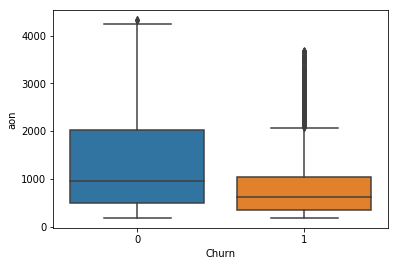

In [63]:
sns.boxplot(x = 'Churn', y ='aon', data = Telecom)

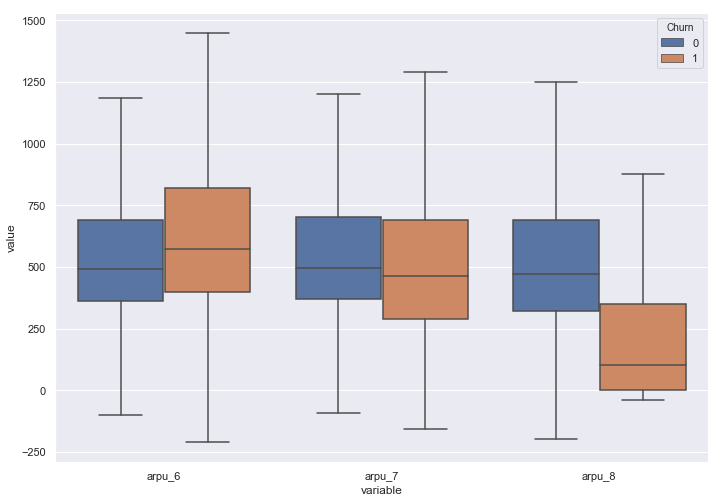

In [65]:
### As shown by the graph below the churners are decre  

dd = pd.melt(Telecom[['arpu_6','arpu_7','arpu_8','Churn']], id_vars=['Churn'],value_vars=['arpu_6','arpu_7','arpu_8'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = 'variable', y = 'value', hue = 'Churn', data = dd, showfliers=False)

# Derived Variables - I
#####  There is also a need to identify the below data points for each Month
     Voice user: total_og_mou_6 + total_ic_mou_6 > 0 
     Data  user: where vol_2g_mb_6 + vol_3g_mb_6 > 0
     Data and Voice customer: where voice user is true and data user is true
     Data Only user: where data user flag is 1 and voice user flag is 0
     Voice only user: where voice user flag is 1 and data user flag is 0
     IC only user: total_og_mou_6 = 0 but total_ic_mou_6 > 0
     OG only user:  total_og_mou_6 = 0 but total_ic_mou_6 > 0

In [70]:
wa_df = Telecom# Copy the main DF to a WORK AREA where we will add derived variables

In [71]:
# Set the user of MINUTES (voice callers) flag for each month
def SetMinsFlag(row,col1, col2):
    if row[col1] + row[col2] > 0:
        flag = 1
    else:
        flag = 0
    return flag

In [72]:
# Set the user of MINUTES (voice callers) flag for each month
wa_df['minsFlag_6'] = wa_df.apply(lambda row: SetMinsFlag(row,'total_og_mou_6','total_ic_mou_6'),axis=1)
wa_df['minsFlag_7'] = wa_df.apply(lambda row: SetMinsFlag(row,'total_og_mou_7','total_ic_mou_7'),axis=1)
wa_df['minsFlag_8'] = wa_df.apply(lambda row: SetMinsFlag(row,'total_og_mou_8','total_ic_mou_8'),axis=1)

In [73]:
wa_df['minsFlag_6'].where(wa_df.minsFlag_6 == 0).dropna().count()

912

In [74]:
wa_df['minsFlag_7'].where(wa_df.minsFlag_7 == 0).dropna().count()

820

In [75]:
wa_df['minsFlag_8'].where(wa_df.minsFlag_8 == 0).dropna().count()

1989

In [76]:
1989-820

1169

In [77]:
# Set the user of DATA (Data Users) flag for each month
def SetDataFlag(row,col1, col2):
    if row[col1] + row[col2] > 0:
        flag = 1
    else:
        flag = 0
    return flag

In [79]:
# Set the user of DATA (Data Users) flag for each month
wa_df['dataFlag_6'] = wa_df.apply(lambda row: SetDataFlag(row,'vol_2g_mb_6','vol_3g_mb_6'),axis=1)
wa_df['dataFlag_7'] = wa_df.apply(lambda row: SetDataFlag(row,'vol_3g_mb_7','vol_3g_mb_7'),axis=1)
wa_df['dataFlag_8'] = wa_df.apply(lambda row: SetDataFlag(row,'vol_3g_mb_8','vol_3g_mb_8'),axis=1)

In [80]:
wa_df['dataFlag_6'].where(wa_df.dataFlag_6 == 0).dropna().count()

19549

In [81]:
wa_df['dataFlag_7'].where(wa_df.dataFlag_7 == 0).dropna().count()

22369

In [82]:
wa_df['dataFlag_8'].where(wa_df.dataFlag_8 == 0).dropna().count()

22621

    Only ~35% of our total high value users are data users
    But they too are droppig month on month
    we have lost about 2820 from June to July 
    and 252 data users from July to August

In [83]:
# now that we know data users and voice users, let us see how many are data only users and voice only users
# 0: both data and voice users
# 1: only voice user
# 2: only data user
# 3: doesn't use any
def DataVoiceBothFlag(row,voiceFlag, dataFlag):
    if row[voiceFlag] == 1 and row[dataFlag] == 1:
        flag = 0 
    elif row[voiceFlag] == 1 and row[dataFlag] == 0:
        flag = 1
    elif row[voiceFlag] == 0 and row[dataFlag] == 1:
        flag = 2
    else:
        flag = 3
    
    return flag
 

In [84]:
# Set the user of DATA (Data Users) flag for each month
wa_df['usageFlag_6'] = wa_df.apply(lambda row: DataVoiceBothFlag(row,'minsFlag_6','dataFlag_6'),axis=1)
wa_df['usageFlag_7'] = wa_df.apply(lambda row: DataVoiceBothFlag(row,'minsFlag_7','dataFlag_7'),axis=1)
wa_df['usageFlag_8'] = wa_df.apply(lambda row: DataVoiceBothFlag(row,'minsFlag_8','dataFlag_8'),axis=1)

In [85]:
print('\n 6th Month --------------')
print ('\n Both Voice & Data Users in 6th month', wa_df['usageFlag_6'].where(wa_df.usageFlag_6 == 0).dropna().count() )
print ('\n Voice Only Users in 6th month', wa_df['usageFlag_6'].where(wa_df.usageFlag_6 == 1).dropna().count() )
print ('\n Data Only Users in 6th month', wa_df['usageFlag_6'].where(wa_df.usageFlag_6 == 2).dropna().count() )
print ('\n ZERO usage Users in 6th month', wa_df['usageFlag_6'].where(wa_df.usageFlag_6 == 3).dropna().count() )
print('\n 7th Month --------------')
print ('\n Both Voice & Data Users in 7th month', wa_df['usageFlag_7'].where(wa_df.usageFlag_7 == 0).dropna().count() )
print ('\n Voice Only Users in 7th month', wa_df['usageFlag_7'].where(wa_df.usageFlag_7 == 1).dropna().count() )
print ('\n Data Only Users in 7th month', wa_df['usageFlag_7'].where(wa_df.usageFlag_7 == 2).dropna().count() )
print ('\n ZERO usage Users in 7th month', wa_df['usageFlag_7'].where(wa_df.usageFlag_7 == 3).dropna().count() )
print('\n 8th Month --------------')
print ('\n Both Voice & Data Users in 8th month', wa_df['usageFlag_8'].where(wa_df.usageFlag_8 == 0).dropna().count() )
print ('\n Voice Only Users in 8th month', wa_df['usageFlag_8'].where(wa_df.usageFlag_8 == 1).dropna().count() )
print ('\n Data Only Users in 8th month', wa_df['usageFlag_8'].where(wa_df.usageFlag_8 == 2).dropna().count() )
print ('\n ZERO usage Users in 8th month', wa_df['usageFlag_8'].where(wa_df.usageFlag_8 == 3).dropna().count() )


 6th Month --------------

 Both Voice & Data Users in 6th month 10173

 Voice Only Users in 6th month 18894

 Data Only Users in 6th month 257

 ZERO usage Users in 6th month 655

 7th Month --------------

 Both Voice & Data Users in 7th month 7401

 Voice Only Users in 7th month 21758

 Data Only Users in 7th month 209

 ZERO usage Users in 7th month 611

 8th Month --------------

 Both Voice & Data Users in 8th month 7157

 Voice Only Users in 8th month 20833

 Data Only Users in 8th month 201

 ZERO usage Users in 8th month 1788


#  Outlier Analysi
1. Amount of recharge : Mins and Data
2. Minutes of Usage
3. 2G and 3G total data usage
4. aon 
5. last day of recharge -- cannot be normalized

### 1. Amount of recharge : Mins , arpu, average data 
    we do outlier removal and normalization

In [86]:
wa_df.columns.where(wa_df.columns.str.contains('amt')).dropna()
# Total Voice recharge amounts for 6,7,8
# wa_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']]
wa_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']].sort_values(by = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],ascending=False).head()
# Average Data recharge amounts for 6 7 8

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
38610,35190,40335,45320,0.0,0.0,0.0
33019,18500,19000,14000,0.0,0.0,0.0
51314,17840,16725,18914,252.0,0.0,252.0
67717,13096,19204,13080,0.0,0.0,0.0
98208,12795,7735,6855,0.0,0.0,0.0


In [87]:
wa_df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']].describe([.05,.25,.5,.75,.9,.95,.97,.98,.99,.999,.9999])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,697.720204,696.309083,613.908403,90.788857,97.605184,89.803108
std,539.488337,562.327538,602.047678,191.272837,198.435609,185.886834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,240.000000,220.000000,0.000000,0.000000,0.000000,0.000000
25%,433.000000,427.000000,309.000000,0.000000,0.000000,0.000000
50%,585.000000,581.000000,520.000000,0.000000,0.000000,0.000000
75%,838.000000,836.000000,790.000000,154.000000,154.000000,145.000000
90%,1181.000000,1194.000000,1156.000000,277.000000,302.000000,263.200000
95%,1480.000000,1510.000000,1494.100000,450.000000,472.000000,448.100000


In [88]:
print('\n recharge greather than 95%    1480.000000 ',wa_df[wa_df.total_rech_amt_6 > 1480.000000].mobile_number.count())
print('\n recharge greather than 99%    2376.220000	 ',wa_df[wa_df.total_rech_amt_6 > 2376.220000].mobile_number.count())
print('\n recharge greather than 99.9%  4616.694000 ',wa_df[wa_df.total_rech_amt_6 > 4616.694000].mobile_number.count())
print('\n recharge greather than 99.99% 13106.436800 ',wa_df[wa_df.total_rech_amt_6 > 13106.436800].mobile_number.count())


 recharge greather than 95%    1480.000000  1495

 recharge greather than 99%    2376.220000	  300

 recharge greather than 99.9%  4616.694000  30

 recharge greather than 99.99% 13106.436800  3


In [91]:
wa_df[wa_df.total_rech_amt_6 > 3853.364000][['mobile_number','Churn']].mobile_number.count() #99%

60

In [92]:
wa_df.shape[1]

233

In [93]:
30/wa_df.shape[1]

0.12875536480686695

In [94]:
# let me drop the customers who are recharing for more than 4616 in June
wa_df1 = wa_df[wa_df.total_rech_amt_6 < 4616]

In [95]:
wa_df1[['arpu_6','arpu_7','arpu_8','total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']].describe([.05,.25,.5,.75,.9,.95,.97,.98,.99,.999,.9999])

,arpu_6,arpu_7,arpu_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,581.301572,584.226619,529.814453,689.587799,690.377575,607.385155,90.369566,97.454566,89.674660
std,360.281662,379.590119,404.722897,433.101154,465.672600,491.597246,183.303895,196.754587,184.411309
min,-2258.709000,-2014.045000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,202.229600,212.847200,22.444600,240.000000,220.000000,0.000000,0.000000,0.000000,0.000000
25%,364.300000,365.204000,289.759000,433.000000,427.000000,309.000000,0.000000,0.000000,0.000000
50%,495.705000,493.590000,452.091000,584.000000,581.000000,520.000000,0.000000,0.000000,0.000000
75%,703.406000,700.307000,670.853000,837.000000,834.000000,789.000000,154.000000,154.000000,145.000000
90%,990.589800,993.189800,982.612800,1177.000000,1190.000000,1152.200000,277.000000,301.200000,263.000000
95%,1235.154800,1253.961400,1253.440200,1468.200000,1505.600000,1488.600000,450.000000,469.000000,448.000000


In [96]:
### Feature Standardisation

# Normalising continuous features
df = wa_df1[['arpu_6','arpu_7','arpu_8','total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']]

normalized_df=(df-df.mean())/df.std()

wa_df1 = wa_df1.drop(['arpu_6','arpu_7','arpu_8','total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], 1)

wa_df1 = pd.concat([wa_df1,normalized_df],axis=1)

In [97]:
wa_df1[['arpu_6','arpu_7','arpu_8','total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']].describe([.05,.25,.5,.75,.9,.95,.97,.98,.99,.999,.9999])

,arpu_6,arpu_7,arpu_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04
mean,-1.102054e-14,1.542629e-14,-4.533628e-15,-6.998902e-17,-4.317966e-17,1.233705e-17,-2.325059e-17,2.443684e-17,4.650118e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.882751e+00,-6.844940e+00,-2.161833e+00,-1.592210e+00,-1.482539e+00,-1.235534e+00,-4.930041e-01,-4.953103e-01,-4.862753e-01
5%,-1.052155e+00,-9.783696e-01,-1.253623e+00,-1.038067e+00,-1.010104e+00,-1.235534e+00,-4.930041e-01,-4.953103e-01,-4.862753e-01
25%,-6.023109e-01,-5.769977e-01,-5.931353e-01,-5.924431e-01,-5.655853e-01,-6.069708e-01,-4.930041e-01,-4.953103e-01,-4.862753e-01
50%,-2.375824e-01,-2.387750e-01,-1.920412e-01,-2.437948e-01,-2.348808e-01,-1.777576e-01,-4.930041e-01,-4.953103e-01,-4.862753e-01
75%,3.389138e-01,3.058045e-01,3.484818e-01,3.403644e-01,3.084193e-01,3.694383e-01,3.471308e-01,2.873907e-01,3.000106e-01
90%,1.136023e+00,1.077381e+00,1.118786e+00,1.125400e+00,1.072905e+00,1.108254e+00,1.018148e+00,1.035531e+00,9.398845e-01
95%,1.814839e+00,1.764363e+00,1.787954e+00,1.797761e+00,1.750634e+00,1.792554e+00,1.961936e+00,1.888370e+00,1.943077e+00


In [98]:
wa_df1.columns.where(wa_df1.columns.str.contains('total_ic_mou')).dropna()

Index(['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'], dtype='object')

In [99]:
wa_df1.columns.where(wa_df1.columns.str.contains('total_og_mou')).dropna()

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'], dtype='object')

In [100]:
# total incomng and outgoing mou 
wa_df1[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].describe([.05,.25,.5,.75,.9,.95,.97,.98,.99,.999,.9999])
# - there is a large variation - but let us retain this data as is and standardize

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,307.457679,314.886627,295.391159,686.208517,708.964870,623.595829
std,361.076274,369.622464,360.303789,657.983730,683.301663,684.066166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,8.060000,13.492000,0.000000,20.730000,26.650000,0.000000
25%,90.080000,99.030000,78.990000,266.480000,275.380000,189.090000
50%,205.280000,211.260000,193.510000,510.380000,525.860000,435.810000
75%,393.580000,396.830000,380.360000,899.480000,931.140000,833.110000
90%,682.990000,685.886000,663.676000,1457.746000,1494.190000,1393.700000
95%,932.840000,941.860000,926.410000,1919.260000,1955.734000,1882.638000


In [101]:
### Feature Standardisation
# Normalising continuous features
df = wa_df1[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']]

normalized_df=(df-df.mean())/df.std()

wa_df1 = wa_df1.drop(['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'], 1)

wa_df1 = pd.concat([wa_df1,normalized_df],axis=1)

In [102]:
# total incomng and outgoing mou 
wa_df1[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8','total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].describe([.05,.25,.5,.75,.9,.95,.97,.98,.99,.999,.9999])
# - there is a large variation - but let us retain this data as is and standardize

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04
mean,-2.933679e-14,-3.252354e-14,-3.091913e-14,4.515834e-15,2.828268e-15,-1.446507e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.515034e-01,-8.519142e-01,-8.198392e-01,-1.042896e+00,-1.037558e+00,-9.116016e-01
5%,-8.291813e-01,-8.154121e-01,-8.198392e-01,-1.011391e+00,-9.985558e-01,-9.116016e-01
25%,-6.020270e-01,-5.839922e-01,-6.006075e-01,-6.379011e-01,-6.345439e-01,-6.351810e-01
50%,-2.829809e-01,-2.803580e-01,-2.827646e-01,-2.672232e-01,-2.679708e-01,-2.745141e-01
75%,2.385156e-01,2.216948e-01,2.358256e-01,3.241288e-01,3.251494e-01,3.062776e-01
90%,1.040036e+00,1.003725e+00,1.022151e+00,1.172578e+00,1.149163e+00,1.125774e+00
95%,1.731995e+00,1.696253e+00,1.751352e+00,1.873985e+00,1.824625e+00,1.840527e+00


### Outlier 3. 2g and 3g data usage
    we do outlier removal and normalization

In [103]:
wa_df1.columns.where(wa_df1.columns.str.contains('mb')).dropna()

Index(['mobile_number', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'],
      dtype='object')

In [104]:
wa_df1[[ 'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7','vol_3g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8']].head()

,vol_2g_mb_6,vol_3g_mb_6,vol_2g_mb_7,vol_3g_mb_7,vol_2g_mb_8,vol_3g_mb_8
7,0.0,0.0,0.0,0.00,0.00,0.00
8,0.0,0.0,356.0,750.95,0.03,11.94
13,0.0,0.0,0.0,0.00,0.02,0.00
16,0.0,0.0,0.0,0.00,0.00,0.00
17,0.0,0.0,0.0,0.00,0.00,0.00


In [105]:
wa_df1[[ 'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7',
       'vol_3g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8']].describe([.05,.25,.5,.75,.9,.95,.97,.98,.99,.999,.9999])

,vol_2g_mb_6,vol_3g_mb_6,vol_2g_mb_7,vol_3g_mb_7,vol_2g_mb_8,vol_3g_mb_8
count,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,78.900761,256.854625,78.252257,277.348965,69.315965,268.968596
std,277.584692,822.331084,280.544302,840.293116,268.742265,841.943779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.490000,0.000000,14.980000,2.410000,9.690000,0.000000
90%,199.428000,876.750000,194.736000,962.828000,153.916000,915.548000
95%,485.206000,1509.914000,470.890000,1614.090000,411.032000,1542.326000


In [106]:
### Feature Standardisation
# Normalising continuous features
df = wa_df1[[ 'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7','vol_3g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8']]

normalized_df=(df-df.mean())/df.std()

wa_df1 = wa_df1.drop([ 'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7','vol_3g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8'], 1)

wa_df1 = pd.concat([wa_df1,normalized_df],axis=1)

In [107]:
wa_df1[[ 'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_2g_mb_7',
       'vol_3g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8']].describe([.05,.25,.5,.75,.9,.95,.97,.98,.99,.999,.9999])

,vol_2g_mb_6,vol_3g_mb_6,vol_2g_mb_7,vol_3g_mb_7,vol_2g_mb_8,vol_3g_mb_8
count,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04,2.994900e+04
mean,9.143650e-16,3.831602e-16,-1.708207e-16,5.067679e-16,-5.238500e-16,-7.293093e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.842403e-01,-3.123494e-01,-2.789301e-01,-3.300622e-01,-2.579273e-01,-3.194615e-01
5%,-2.842403e-01,-3.123494e-01,-2.789301e-01,-3.300622e-01,-2.579273e-01,-3.194615e-01
25%,-2.842403e-01,-3.123494e-01,-2.789301e-01,-3.300622e-01,-2.579273e-01,-3.194615e-01
50%,-2.842403e-01,-3.123494e-01,-2.789301e-01,-3.300622e-01,-2.579273e-01,-3.194615e-01
75%,-2.320400e-01,-3.123494e-01,-2.255339e-01,-3.271941e-01,-2.218704e-01,-3.194615e-01
90%,4.341999e-01,7.538270e-01,4.152062e-01,8.157618e-01,3.147999e-01,7.679603e-01
95%,1.463716e+00,1.523789e+00,1.399557e+00,1.590803e+00,1.271538e+00,1.512402e+00


# CORRELATION Detection

In [108]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

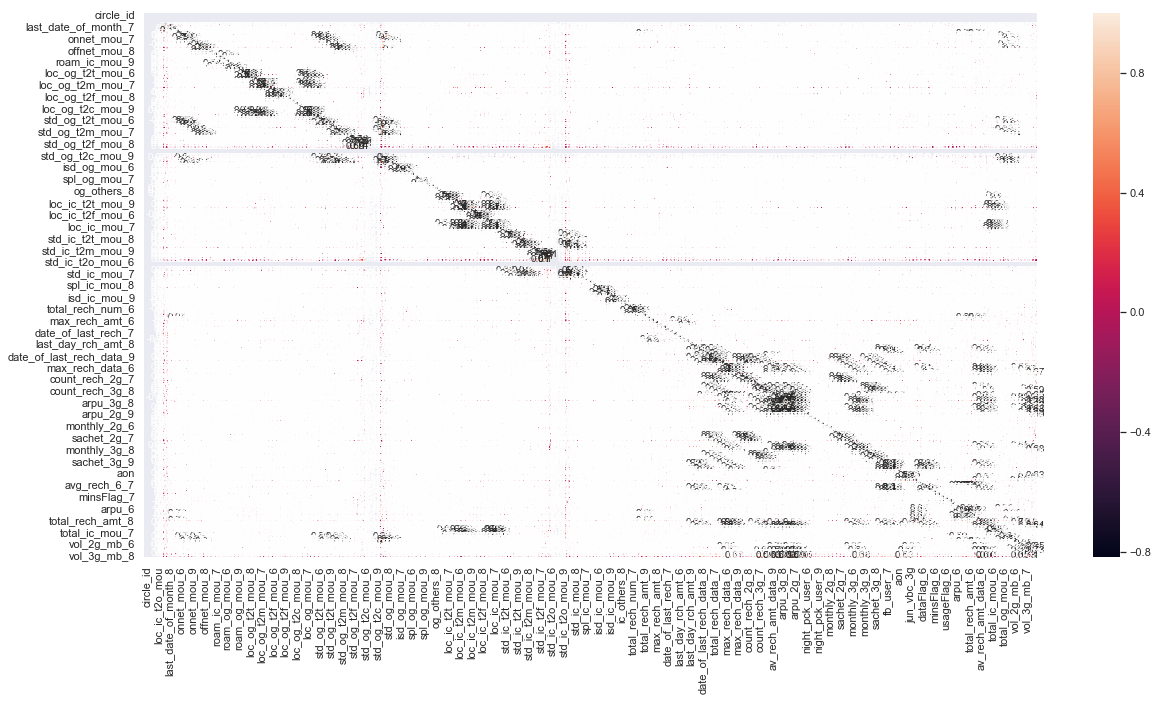

In [112]:
# Let's see the correlation matrix 

fig_df = wa_df1
fig_df.drop(['mobile_number','Churn'],axis=1,inplace=True)
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(fig_df.corr(),annot = True)
plt.savefig("corr.png")

In [130]:
Telecom = Telecom.fillna(0)

In [131]:
Telecom.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,Churn,dataFlag_6,dataFlag_7,dataFlag_8,minsFlag_6,minsFlag_7,minsFlag_8,usageFlag_6,usageFlag_7,usageFlag_8
7,7000701601,30,31.0,31.0,30.0,1069.180,1349.850,3171.480,500.000,57.84,...,1,0,0,0,1,1,1,1,1,1
8,7001524846,30,31.0,31.0,30.0,378.721,492.223,137.362,166.787,413.69,...,0,0,1,1,1,1,1,1,0,0
13,7002191713,30,31.0,31.0,30.0,492.846,205.671,593.260,322.732,501.76,...,0,0,0,0,1,1,1,1,1,1
16,7000875565,30,31.0,31.0,30.0,430.975,299.869,187.894,206.490,50.51,...,0,0,0,0,1,1,1,1,1,1
17,7000187447,30,31.0,31.0,30.0,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,0,1,1,0,1,1,3


In [132]:
 cols2  = Telecom.filter(like = '_9').columns
Telecom = Telecom.drop(cols2,axis=1)

In [133]:
 cols2  = Telecom.filter(like = 'last_date_of_month').columns
Telecom = Telecom.drop(cols2,axis=1)

In [114]:
Telecom.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1, inplace=True)

In [136]:
Telecom.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1, inplace=True)

KeyError: "['std_og_t2c_mou_6' 'std_og_t2c_mou_7' 'std_og_t2c_mou_8'\n 'std_ic_t2o_mou_6' 'std_ic_t2o_mou_7' 'std_ic_t2o_mou_8'] not found in axis"

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Data Split

In [138]:
X = Telecom.drop(columns=['Churn'])
y = Telecom['Churn']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [140]:
Train_Tel_ID = X_train['mobile_number']
X_train.drop(columns=['mobile_number'], inplace=True)
Test_Tel_ID = X_test['mobile_number']
X_test.drop(columns=['mobile_number'], inplace=True)

D:\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [141]:
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,avg_rech_6_7,dataFlag_6,dataFlag_7,dataFlag_8,minsFlag_6,minsFlag_7,minsFlag_8,usageFlag_6,usageFlag_7,usageFlag_8
76438,895.600,801.002,1016.692,1174.66,1283.08,975.56,743.06,800.63,822.19,0.00,...,975.5,0,0,0,1,1,1,1,1,1
72869,556.442,511.643,547.379,193.73,139.38,152.16,342.19,467.24,581.43,45.78,...,671.0,0,0,0,1,1,1,1,1,1
86053,309.809,348.243,164.400,32.08,72.68,41.23,257.38,194.36,94.29,0.00,...,375.0,0,0,0,1,1,1,1,1,1
29093,271.666,407.014,369.907,16.93,12.76,19.54,258.51,271.71,227.01,0.00,...,433.0,1,1,1,1,1,1,0,0,0
96385,627.759,783.374,1355.791,546.56,591.63,1059.44,166.66,116.59,452.86,71.91,...,981.0,0,0,0,0,0,1,3,3,1


## Feature Standardisation

In [142]:
### Feature Standardisation
# Normalising continuous features
cat_list = X.nunique().sort_values()[X.nunique().sort_values() == 2]
col_n_std = list(cat_list.index) + list( Telecom.filter(like = 'date').columns)

In [143]:
std_list = X_train.columns.difference(col_n_std)

In [144]:
X_train[std_list]=(X_train[std_list]-X_train[std_list].mean())/X_train[std_list].std()

D:\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [145]:
 
X_test[std_list]=(X_test[std_list]-X_test[std_list].mean())/X_test[std_list].std()

D:\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [146]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,avg_rech_6_7,dataFlag_6,dataFlag_7,dataFlag_8,minsFlag_6,minsFlag_7,minsFlag_8,usageFlag_6,usageFlag_7,usageFlag_8
88105,-1.276387,0.129814,0.873079,-0.644669,-0.524219,-0.463178,-0.899044,1.854340,4.052243,-0.222952,...,-0.593086,0,0,0,0,1,1,3.868164,0.366657,0.170475
34588,-0.532185,-0.155183,-0.733307,-0.544455,-0.555433,-0.540576,-0.695385,-0.675676,-0.589831,-0.222952,...,-0.415918,1,1,1,1,1,1,-1.201478,-1.473644,-1.289695
16623,0.669646,-0.193016,-0.036720,-0.465625,-0.578677,-0.551885,0.073460,0.108201,-0.328744,-0.222952,...,0.157213,1,1,1,1,1,1,-1.201478,-1.473644,-1.289695
54904,-0.314961,0.199917,0.945034,-0.202146,-0.433194,-0.451352,-0.349328,1.719264,4.364649,-0.222952,...,0.082667,0,0,0,1,1,1,0.488403,0.366657,0.170475
33555,-0.253801,-0.583035,-0.165794,-0.635486,-0.605304,-0.506002,1.534181,0.594890,1.465140,-0.209918,...,-0.442058,0,0,0,1,1,1,0.488403,0.366657,0.170475


In [147]:
X_train.isnull().sum()

arpu_6              0
arpu_7              0
arpu_8              0
onnet_mou_6         0
onnet_mou_7         0
onnet_mou_8         0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
loc_og_t2t_mou_6    0
loc_og_t2t_mou_7    0
loc_og_t2t_mou_8    0
loc_og_t2m_mou_6    0
loc_og_t2m_mou_7    0
loc_og_t2m_mou_8    0
loc_og_t2f_mou_6    0
loc_og_t2f_mou_7    0
loc_og_t2f_mou_8    0
loc_og_t2c_mou_6    0
loc_og_t2c_mou_7    0
loc_og_t2c_mou_8    0
loc_og_mou_6        0
loc_og_mou_7        0
loc_og_mou_8        0
                   ..
monthly_2g_6        0
monthly_2g_7        0
monthly_2g_8        0
sachet_2g_6         0
sachet_2g_7         0
sachet_2g_8         0
monthly_3g_6        0
monthly_3g_7        0
monthly_3g_8        0
sachet_3g_6         0
sachet_3g_7         0
sachet_3g_8         0
fb_user_6           0
fb_user_7           0
fb_user_8 

# PCA

In [148]:
pca = PCA(svd_solver='randomized', random_state=42)

In [149]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [150]:
pca.components_

array([[ 4.60344285e-03,  6.29250509e-03,  7.37491504e-03, ...,
        -3.65174823e-02, -3.20166896e-02, -2.87664562e-02],
       [ 3.24206175e-03, -8.42424054e-03, -2.18675432e-02, ...,
        -2.82218255e-02, -4.98688550e-03,  2.52490247e-02],
       [ 1.12502807e-02, -1.45441028e-02, -4.02682472e-03, ...,
        -2.95345288e-02,  2.35960218e-02,  3.00346350e-03],
       ...,
       [ 0.00000000e+00, -7.50221363e-17,  2.64506571e-17, ...,
         4.21227111e-02,  7.81617136e-02, -2.19291137e-02],
       [ 0.00000000e+00,  1.02389697e-16,  1.07092092e-16, ...,
         1.45887518e-01,  1.11269510e-01,  1.68185850e-01],
       [ 0.00000000e+00, -5.60250744e-15,  6.67145353e-16, ...,
         4.06975837e-02, -2.68261483e-02, -3.68038343e-03]])

In [151]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,arpu_6,0.004603,0.003242
1,arpu_7,0.006293,-0.008424
2,arpu_8,0.007375,-0.021868
3,onnet_mou_6,-0.007052,-0.006032
4,onnet_mou_7,-0.006191,-0.011084


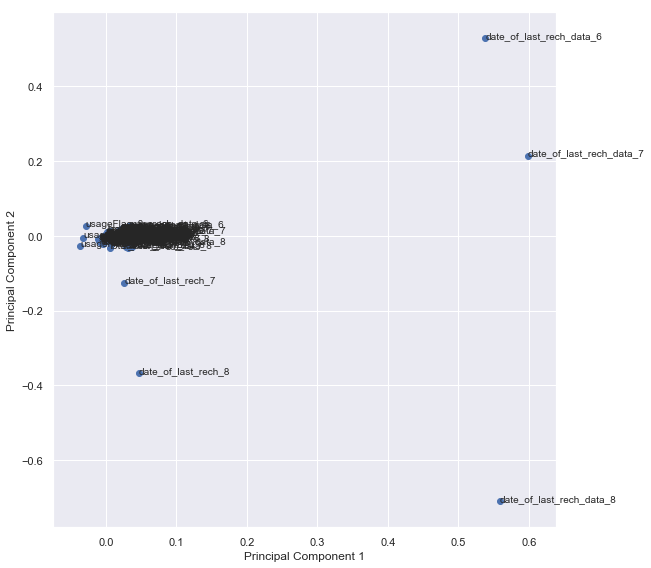

In [152]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [153]:
pca.explained_variance_ratio_

array([4.53742116e-01, 1.10273937e-01, 7.90668354e-02, 7.41485294e-02,
       3.10337770e-02, 2.50585126e-02, 2.10234492e-02, 1.73395667e-02,
       1.55162755e-02, 9.87305396e-03, 9.03233190e-03, 8.64107440e-03,
       7.23755697e-03, 5.99957515e-03, 5.64768762e-03, 5.32370566e-03,
       4.81349352e-03, 4.68964547e-03, 4.51532809e-03, 4.40972015e-03,
       4.29383330e-03, 3.98458075e-03, 3.91051043e-03, 3.39386142e-03,
       3.30631647e-03, 2.98758473e-03, 2.92169973e-03, 2.81814272e-03,
       2.73932234e-03, 2.58493691e-03, 2.48852488e-03, 2.45586970e-03,
       2.14908272e-03, 2.00841368e-03, 1.94855535e-03, 1.89550557e-03,
       1.87732324e-03, 1.82693845e-03, 1.78205283e-03, 1.61531892e-03,
       1.61029900e-03, 1.54938259e-03, 1.51718914e-03, 1.49598515e-03,
       1.48464518e-03, 1.39638590e-03, 1.33931027e-03, 1.31930360e-03,
       1.31510461e-03, 1.30271401e-03, 1.28471306e-03, 1.22258458e-03,
       1.18964537e-03, 1.14931568e-03, 1.11081040e-03, 1.02169155e-03,
      

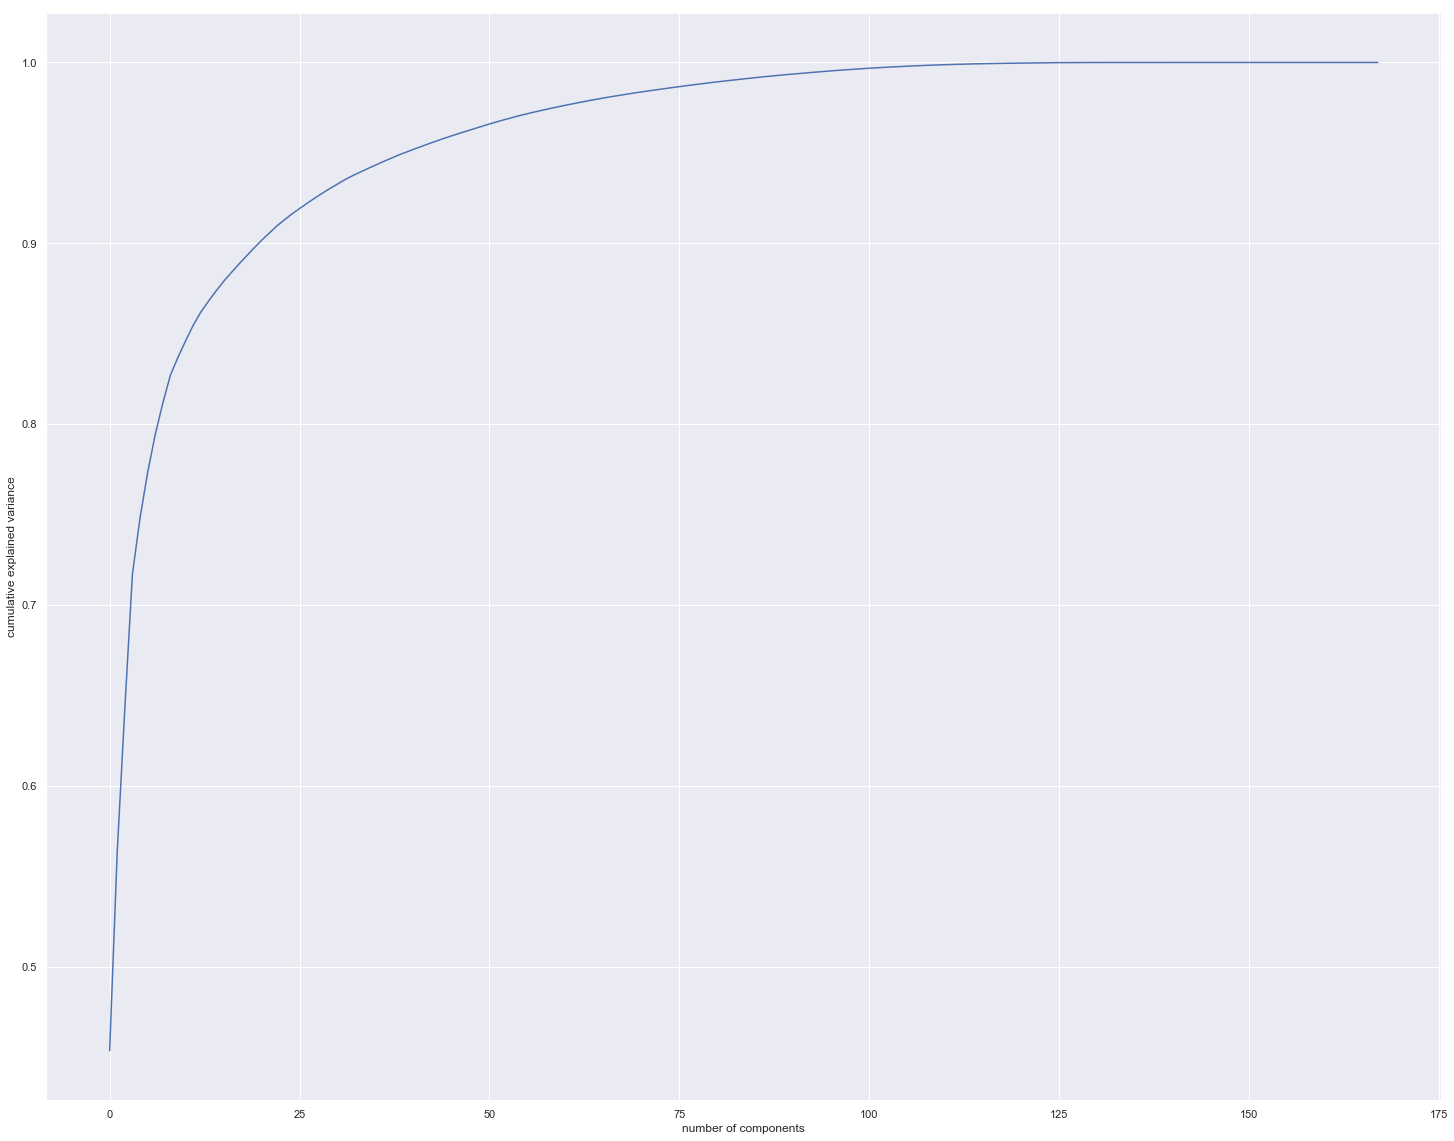

In [154]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (25,20))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [155]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [156]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20985, 45)

In [157]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

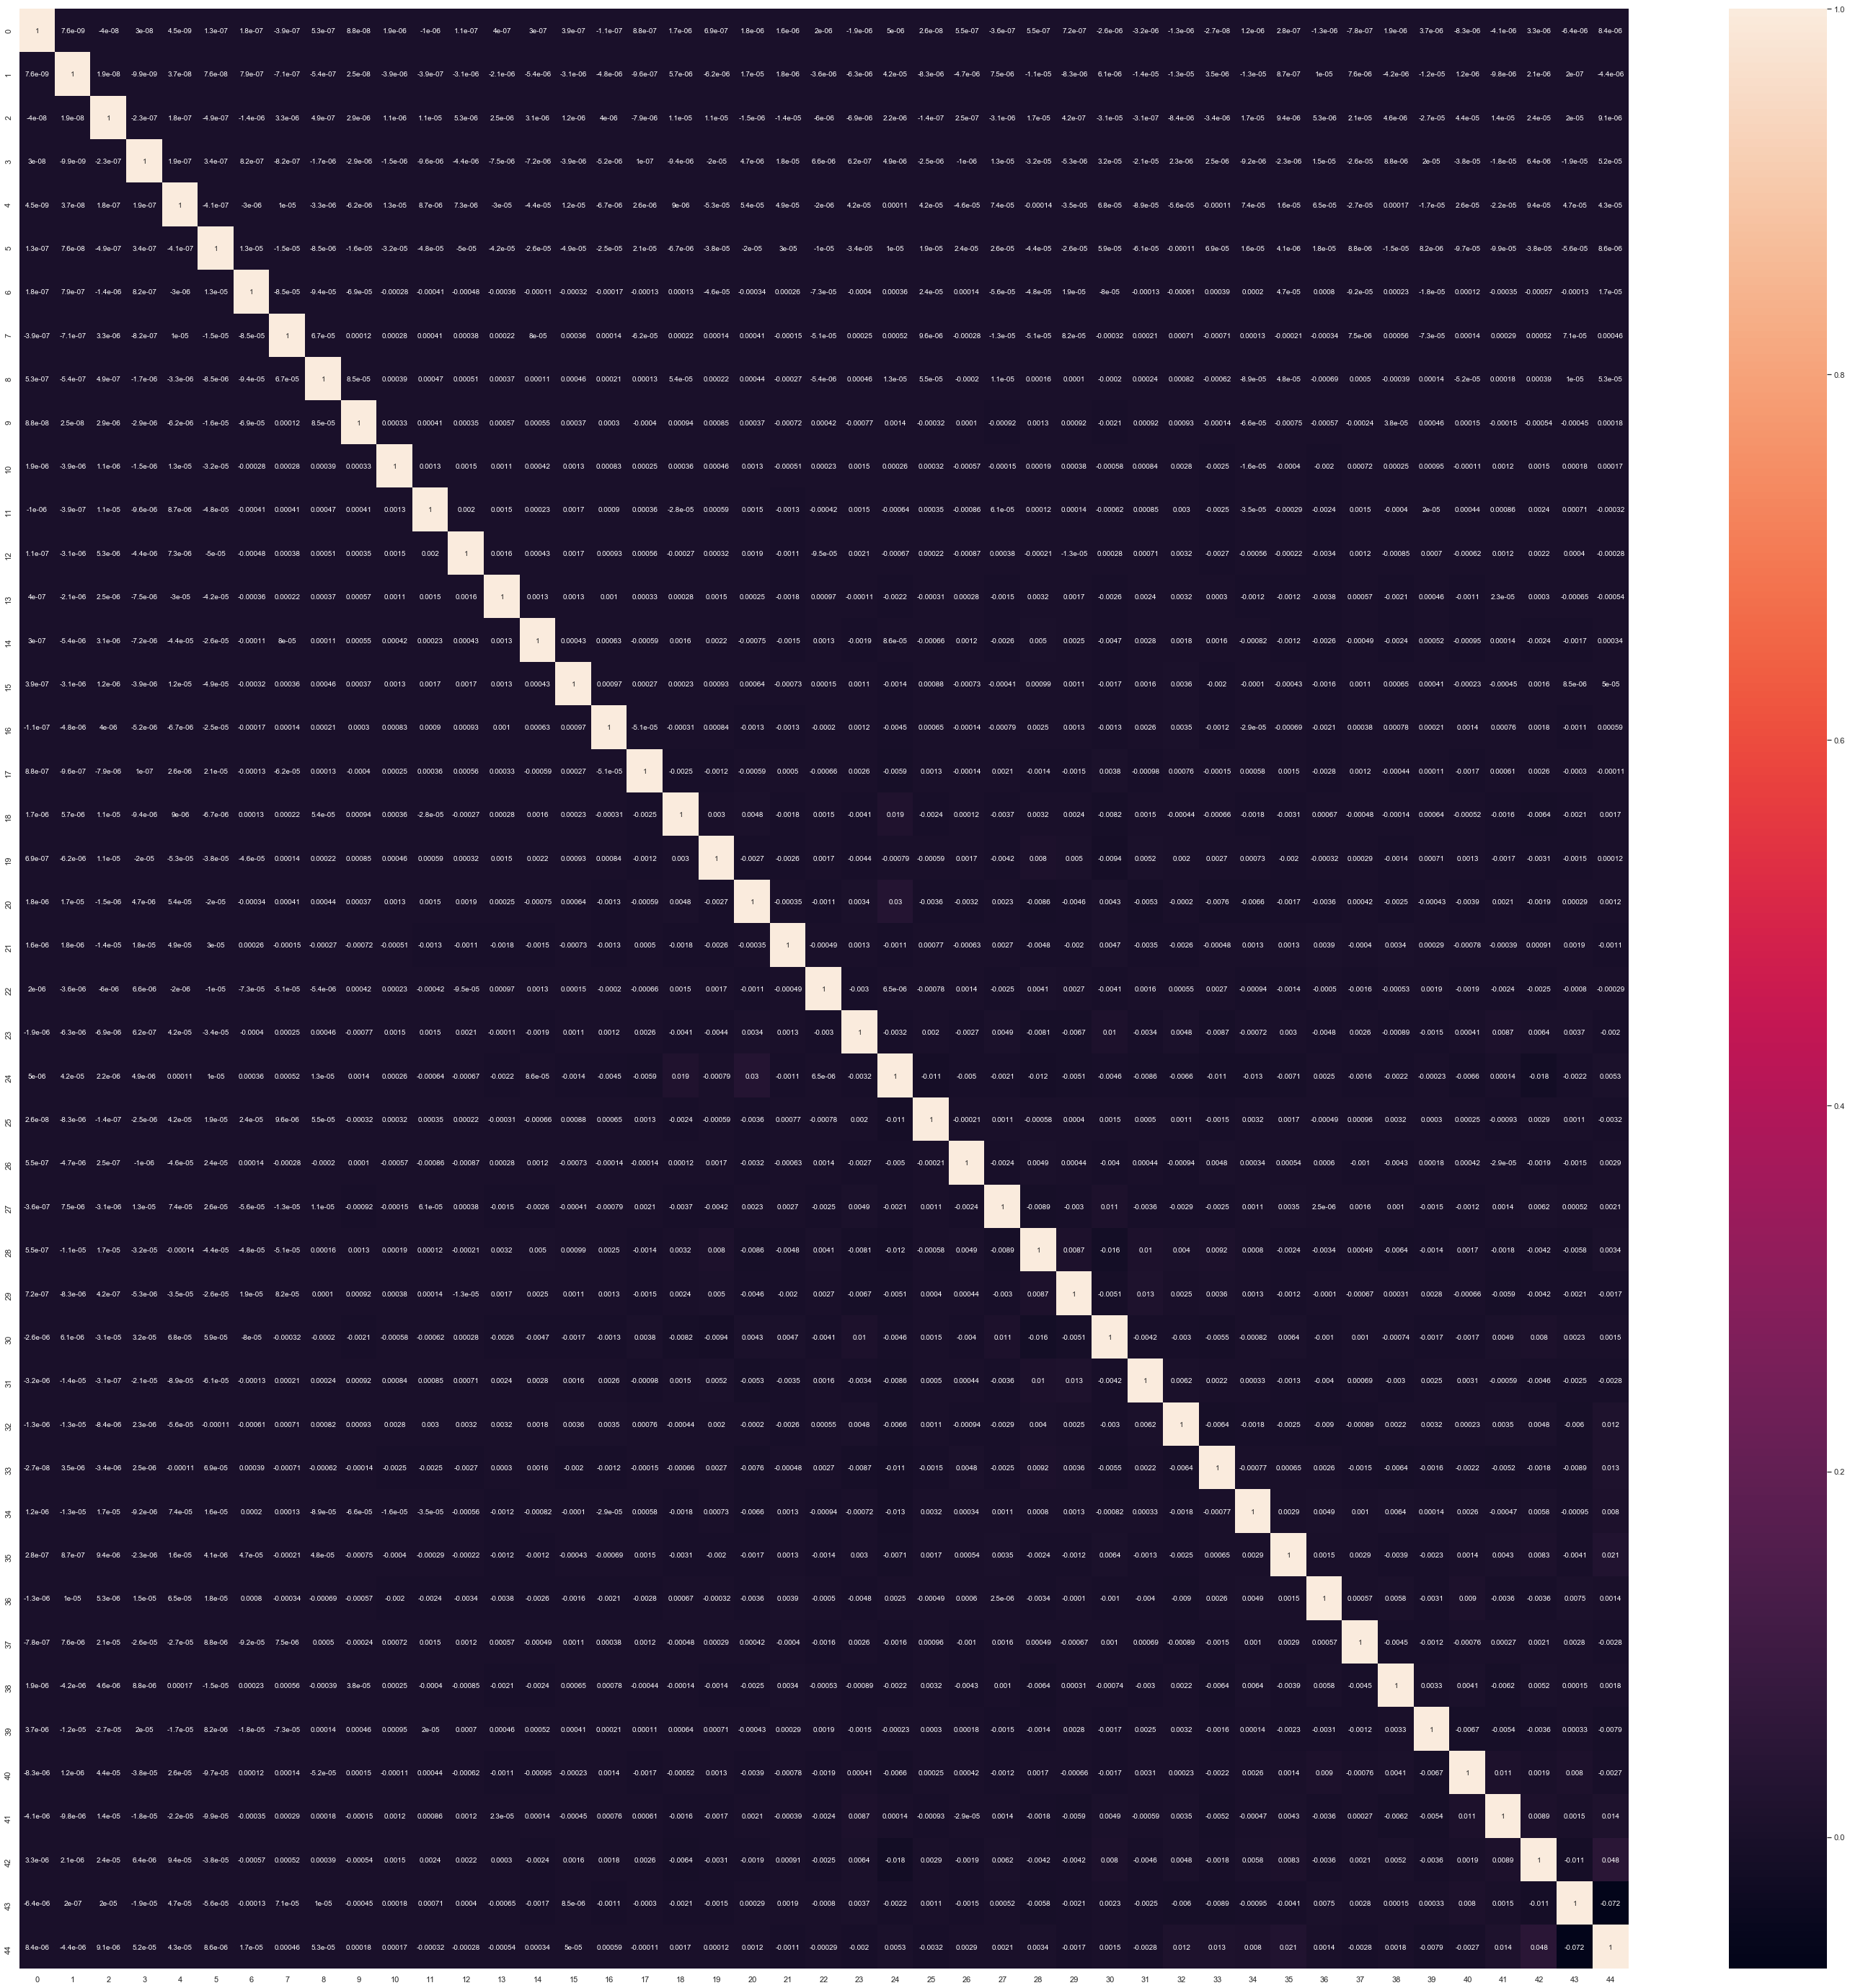

In [158]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (50,50))
sns.heatmap(corrmat,annot = True)

In [159]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.04762762116621927 , min corr:  -0.07206630796771213


In [160]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 45)

In [161]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [162]:
def ConfusionMatrix(pred_probs_test, y_test):
    # Converting y_pred to a dataframe which is an array
    y_pred_df = pd.DataFrame(pred_probs_test)
    # Converting to column dataframe
    y_pred_1 = y_pred_df.iloc[:,[1]]
    # Let's see the head
    y_pred_1.head()
    # Converting y_test to dataframe
    y_test_df = pd.DataFrame(y_test)
    y_test_df.head()   
    # Putting CustID to index
    y_test_df['mobile_number'] = Test_Tel_ID
    # Removing index for both dataframes to append them side by side 
    y_pred_1.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
    # Renaming the column 
    y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
    # Rearranging the columns
    y_pred_final = y_pred_final.reindex_axis(['mobile_number','Churn','Churn_Prob'], axis=1)
    # Let's see the head of y_pred_final
    y_pred_final.head()
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
    # Let's see the head
    y_pred_final.head()
     # Confusion matrix 
    return metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )


In [163]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.9'

In [164]:
confusion = ConfusionMatrix(pred_probs_test, y_test)
confusion

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


array([[8037,  142],
       [ 473,  342]], dtype=int64)

In [165]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9444183313748531

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.7066115702479339

In [168]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.29338842975206614


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.4196319018404908


ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [170]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [171]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [172]:
pca_again = PCA(0.90)

In [173]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 14 components

(20985, 21)

In [174]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [175]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(8994, 21)

In [176]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)
#"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

In [177]:
pd.DataFrame(pred_probs_test2).head()

,0,1
0,0.998925,0.001075
1,0.985135,0.014865
2,0.979836,0.020164
3,0.940522,0.059478
4,0.593850,0.406150


In [178]:
ConfusionMatrix(pred_probs_test2, y_test)

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


array([[8077,  102],
       [ 591,  224]], dtype=int64)

In [179]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.001039
1,0.013115
2,0.019780
3,0.032100
4,0.729351


In [180]:
y_pred_df

,0,1
0,0.998961,0.001039
1,0.986885,0.013115
2,0.980220,0.019780
3,0.967900,0.032100
4,0.270649,0.729351
5,0.976787,0.023213
6,0.934594,0.065406
7,0.770706,0.229294
8,0.969110,0.030890
9,0.983813,0.016187


In [181]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
76438,0
72869,0
86053,0
29093,0
96385,0


In [182]:
# Putting CustID to index
y_test_df['mobile_number'] = Test_Tel_ID
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['mobile_number','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # This is added back by InteractiveShellApp.init_path()


,mobile_number,Churn,Churn_Prob
0,7001868733,0,0.001039
1,7002258538,0,0.013115
2,7001221186,0,0.019780
3,7001037623,0,0.032100
4,7001458554,0,0.729351


In [183]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,Churn,Churn_Prob,predicted
0,7001868733,0,0.001039,0
1,7002258538,0,0.013115,0
2,7001221186,0,0.019780,0
3,7001037623,0,0.032100,0
4,7001458554,0,0.729351,1


In [184]:
# Predicted     not_churn    churn
# Actual
# not_churn        1326      166
# churn            249       333  

In [185]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[8037,  142],
       [ 473,  342]], dtype=int64)

In [186]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.9316210807204803

In [187]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

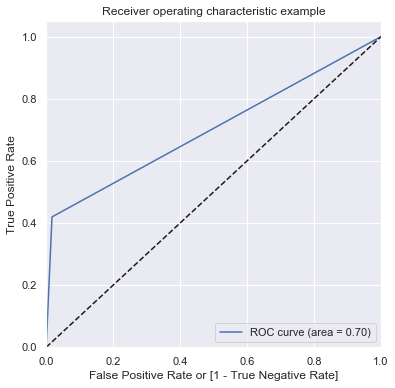

(array([0.        , 0.01736154, 1.        ]),
 array([0.       , 0.4196319, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [188]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

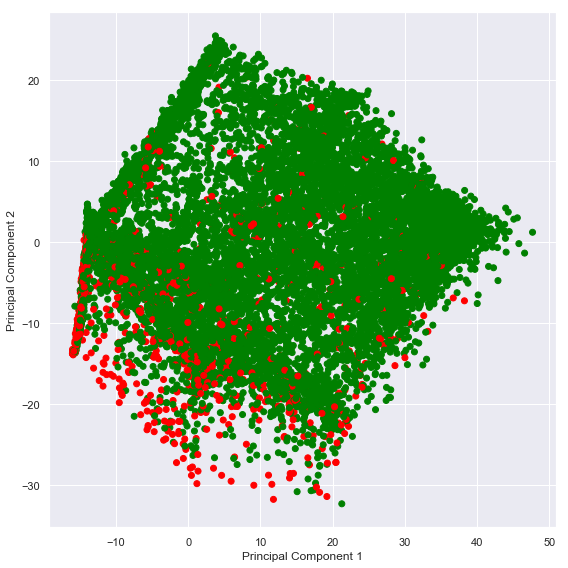

In [189]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

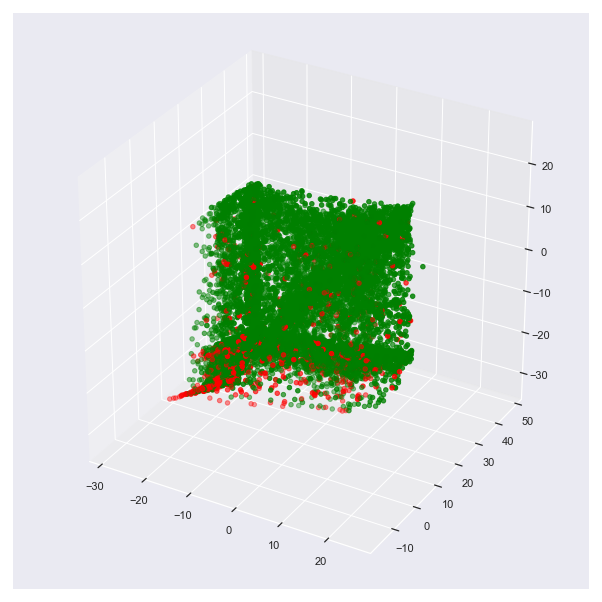

In [190]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))

# Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [191]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [192]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [193]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [194]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [195]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8179
          1       0.71      0.23      0.35       815

avg / total       0.91      0.92      0.90      8994



In [196]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8103   76]
 [ 627  188]]


# SVM

In [197]:
# Importing SVM
from sklearn import svm

In [198]:
svc = svm.SVC(kernel='rbf')

In [199]:
svc.fit(df_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [200]:
predictions = svc.predict(df_test_pca)

In [201]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8179
          1       0.70      0.26      0.38       815

avg / total       0.91      0.92      0.91      8994



In [202]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8090   89]
 [ 604  211]]


In [203]:
print(accuracy_score(y_test,predictions))

0.9229486324216144


# Model Building - Decision tree

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
DTC = DecisionTreeClassifier()

In [206]:
DTC.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [207]:
predictions = DTC.predict(df_test_pca)

In [208]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.93      0.94      8179
          1       0.37      0.39      0.38       815

avg / total       0.89      0.89      0.89      8994



In [209]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7646  533]
 [ 499  316]]


In [210]:
print(accuracy_score(y_test,predictions))

0.885256837891928


# Hyperparameter Tuning


## Tuning max_depth

#### Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [211]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [212]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-package

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.187367,0.010126,0.940910,0.941792,2,{'max_depth': 2},3,0.937589,0.942396,0.936860,...,0.943769,0.942578,0.943531,0.939838,0.942803,0.940080,0.017135,0.005764,0.003035,0.001607
1,0.462230,0.014960,0.942244,0.947272,7,{'max_depth': 7},1,0.939019,0.947578,0.936621,...,0.942578,0.946926,0.949011,0.947284,0.943994,0.946215,0.014756,0.008600,0.004266,0.000708
2,0.731920,0.013717,0.941244,0.974029,12,{'max_depth': 12},2,0.936875,0.974504,0.938289,...,0.939242,0.974089,0.947820,0.973314,0.943994,0.976175,0.025296,0.002927,0.004065,0.001357
3,0.914946,0.016151,0.939528,0.990624,17,{'max_depth': 17},4,0.935922,0.989456,0.934000,...,0.941863,0.991303,0.943293,0.990112,0.942564,0.990351,0.047542,0.002863,0.003805,0.000870


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


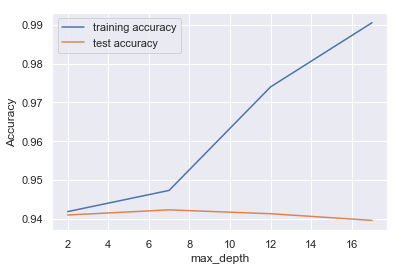

In [213]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit. 

In [214]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [215]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-package

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,2.752631,0.037729,0.942721,0.943066,100,{'n_estimators': 100},1,0.940210,0.943766,0.936621,...,0.944008,0.942697,0.949011,0.941446,0.943756,0.942879,0.161420,0.005414,0.004143,0.001046
1,13.596339,0.175143,0.942578,0.943043,500,{'n_estimators': 500},3,0.940210,0.943587,0.936621,...,0.943531,0.942638,0.948773,0.941625,0.943756,0.942879,0.676468,0.033284,0.004044,0.000957
2,24.491024,0.294110,0.942578,0.943043,900,{'n_estimators': 900},3,0.939971,0.943587,0.936621,...,0.943531,0.942757,0.949011,0.941565,0.943756,0.942701,1.352477,0.033561,0.004146,0.001011
3,34.440296,0.432124,0.942626,0.943114,1300,{'n_estimators': 1300},2,0.940210,0.943826,0.936621,...,0.943531,0.942757,0.949011,0.941625,0.943756,0.942820,0.910571,0.063112,0.004117,0.000998


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


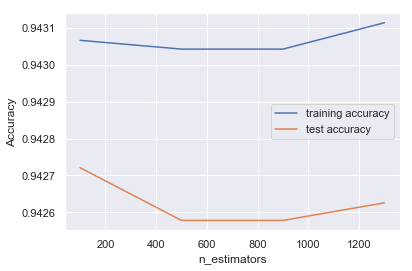

In [216]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning max_features
Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node.

In [217]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 10, 20, 40, 100]}

# instantiate the model
rf = RandomForestClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [5, 10, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [218]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-package

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.298856,0.012495,0.942054,0.945830,5,{'max_features': 5},3,0.939019,0.947042,0.936383,...,0.943531,0.945020,0.946867,0.945199,0.944471,0.945024,0.036754,0.002795,0.003809,0.000922
1,0.430406,0.012498,0.942006,0.947212,10,{'max_features': 10},4,0.938780,0.947221,0.937098,...,0.942340,0.947462,0.946867,0.946509,0.944948,0.947346,0.049726,0.002869,0.003657,0.000366
2,0.722199,0.010887,0.940386,0.949535,20,{'max_features': 20},5,0.936398,0.949783,0.936145,...,0.940910,0.950739,0.945914,0.948892,0.942564,0.948776,0.023747,0.000929,0.003727,0.000707
3,1.315582,0.009687,0.943245,0.952716,40,{'max_features': 40},1,0.940924,0.953893,0.938289,...,0.944961,0.951394,0.948058,0.953062,0.943994,0.952945,0.025058,0.005132,0.003365,0.000835
4,3.535785,0.012751,0.942912,0.956100,100,{'max_features': 100},2,0.941162,0.955442,0.938766,...,0.940434,0.957053,0.948296,0.956100,0.945901,0.955745,0.198114,0.003022,0.003587,0.000542


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


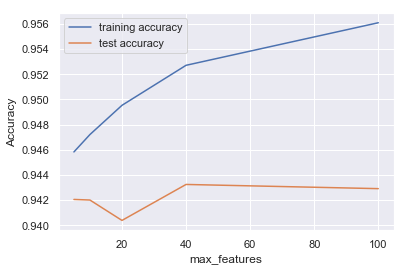

In [219]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_leaf

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [220]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [221]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-package

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.657089,0.012096,0.942244,0.942626,100,{'min_samples_leaf': 100},1,0.939971,0.943587,0.936383,...,0.942578,0.941982,0.948296,0.941089,0.943994,0.942403,0.092526,0.003848,0.003983,0.001080
1,0.545902,0.011064,0.940148,0.941434,150,{'min_samples_leaf': 150},5,0.933540,0.941562,0.937098,...,0.943769,0.942102,0.944484,0.938885,0.941849,0.940497,0.052450,0.002369,0.004190,0.001737
2,0.526263,0.011312,0.941196,0.941351,200,{'min_samples_leaf': 200},2,0.937828,0.943111,0.936145,...,0.943293,0.940851,0.946867,0.939540,0.941849,0.939961,0.083225,0.002329,0.003843,0.001570
3,0.597282,0.010368,0.940720,0.941065,250,{'min_samples_leaf': 250},3,0.936160,0.940549,0.936621,...,0.942340,0.941685,0.945437,0.939957,0.943041,0.940020,0.141440,0.006435,0.003684,0.001197
4,0.502918,0.012158,0.938956,0.939981,300,{'min_samples_leaf': 300},7,0.938542,0.941919,0.936621,...,0.940195,0.939600,0.939004,0.936204,0.940419,0.938889,0.052874,0.003149,0.001364,0.002463


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


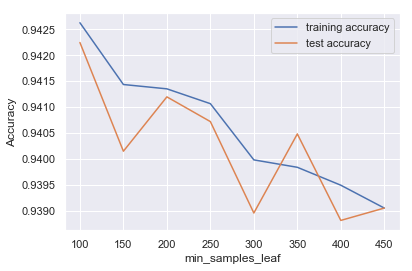

In [222]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Tuning min_samples_split
Let's now look at the performance of the ensemble as we vary min_samples_split.

In [223]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [224]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\envs\tensorflow\lib\site-package

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.115158,0.018536,0.942387,0.943233,200,{'min_samples_split': 200},3,0.939495,0.944004,0.936145,...,0.943531,0.942340,0.948296,0.942459,0.944471,0.942879,0.089923,0.007457,0.004193,0.000858
1,1.111436,0.012585,0.942721,0.943066,250,{'min_samples_split': 250},1,0.939971,0.943706,0.936145,...,0.943769,0.942995,0.949249,0.941208,0.944471,0.943058,0.137451,0.002465,0.004418,0.001054
2,0.789992,0.013809,0.942054,0.943150,300,{'min_samples_split': 300},4,0.939019,0.944004,0.936621,...,0.941863,0.942161,0.948058,0.942161,0.944709,0.942701,0.036570,0.003662,0.004046,0.001035
3,0.773983,0.011390,0.942006,0.942876,350,{'min_samples_split': 350},5,0.938304,0.943647,0.937336,...,0.942816,0.941982,0.947582,0.941804,0.943994,0.942522,0.028764,0.003540,0.003774,0.001007
4,0.752248,0.008961,0.942435,0.942816,400,{'min_samples_split': 400},2,0.939733,0.943230,0.935668,...,0.943769,0.942638,0.948535,0.941625,0.944471,0.942581,0.036828,0.002458,0.004387,0.000787


D:\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


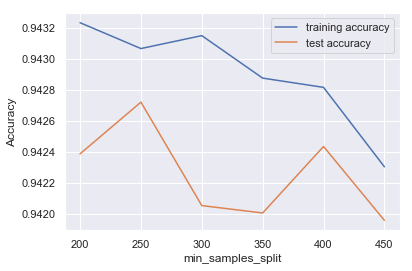

In [225]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [226]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(100, 400, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 15,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

# Optimal With ensemle RandomForest

In [228]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(min_samples_split= 100, n_estimators= 100, max_features= 30, max_depth= 10, min_samples_leaf= 100)

In [229]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [230]:
# Making predictions
predictions = rfc.predict(X_test)

In [231]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8179
          1       0.78      0.43      0.55       815

avg / total       0.93      0.94      0.93      8994



In [232]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8079  100]
 [ 468  347]]


In [233]:
# Printing confusion matrix
print(accuracy_score(y_test,predictions))

0.9368467867467201


In [234]:
# Probablity Analysis

In [235]:
def prob_cutoff(y_pred_final):
    cutoff_df = pd.DataFrame( columns = ['probablity','accuracy','sensitivity','specificity'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i])
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    return cutoff_df

In [236]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [237]:
def probability_df(pred_probs_test,y_test):
    y_pred_df = pd.DataFrame(pred_probs_test)
    y_pred_1 = y_pred_df.iloc[:,[1]]
    y_test_df = pd.DataFrame(y_test)
    y_pred_1.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
    y_pred_final= y_pred_final.rename(columns={ 1: 'Churn_Prob'})
    y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
    confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted)
    display(confusion)
    return y_pred_final

In [238]:
def model_eval(y_pred_final):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
    display(y_pred_final.head())

In [239]:
def final_model(y_pred_final):
    y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.10 else 0)
    confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
    display(confusion)
    display(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))

In [240]:
def final_model_thresh(y_pred_final, thresh):
    y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > thresh else 0)
    confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)
    display(confusion)
    display(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))

In [241]:
# Making predictions
pred_probs_test = rfc.predict_proba(X_test)

In [242]:
y_pred_final = probability_df(pred_probs_test,y_test)

array([[8079,  100],
       [ 468,  347]], dtype=int64)

In [243]:
model_eval(y_pred_final)

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005551,0,1,0,0,0,0,0,0,0,0,0
1,0,0.003914,0,1,0,0,0,0,0,0,0,0,0
2,0,0.026475,0,1,0,0,0,0,0,0,0,0,0
3,0,0.030335,0,1,0,0,0,0,0,0,0,0,0
4,0,0.117727,0,1,1,0,0,0,0,0,0,0,0


In [244]:
cutoff_df = prob_cutoff(y_pred_final)

     probablity  accuracy  sensitivity  specificity
0.0         0.0  0.090616     0.000000     1.000000
0.1         0.1  0.861908     0.861597     0.865031
0.2         0.2  0.931065     0.956596     0.674847
0.3         0.3  0.935624     0.974569     0.544785
0.4         0.4  0.937069     0.982516     0.480982
0.5         0.5  0.936847     0.987774     0.425767
0.6         0.6  0.922170     0.998533     0.155828
0.7         0.7  0.909384     1.000000     0.000000
0.8         0.8  0.909384     1.000000     0.000000
0.9         0.9  0.909384     1.000000     0.000000


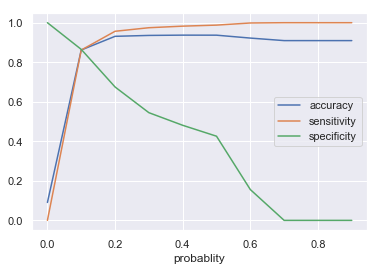

In [245]:
cutoff_df.plot.line(x='probablity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [246]:
final_model(y_pred_final)

array([[7047, 1132],
       [ 110,  705]], dtype=int64)

0.8619079386257505

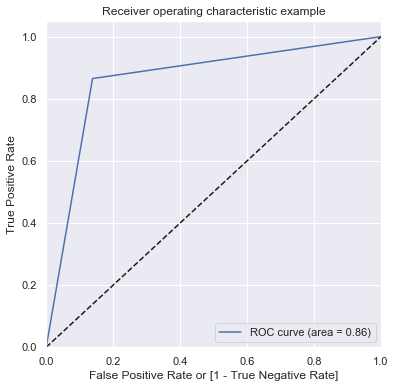

(array([0.        , 0.13840323, 1.        ]),
 array([0.        , 0.86503067, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [247]:
draw_roc(y_pred_final.Churn, y_pred_final.final_predicted)

In [248]:
rfc.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state')

In [249]:
def plot_bar_x(temp):
    # this is for plotting purpose
    index = np.arange(len(temp['index']))
    plt.bar(index, temp['importance'])
    plt.xlabel('Features', fontsize=10)
    plt.ylabel('Importance', fontsize=10)
    plt.xticks(index, temp['index'], fontsize=10, rotation=30)
    plt.title('Importnant factor to churn/NoChurn Pred')
    plt.show()

## Features Importance
### The below figure tells the importance of each and every feature it quantify each and every feature importance Example 'total_ic_mou_8', 'ioc_ic_mou_8 are two topmost important feature

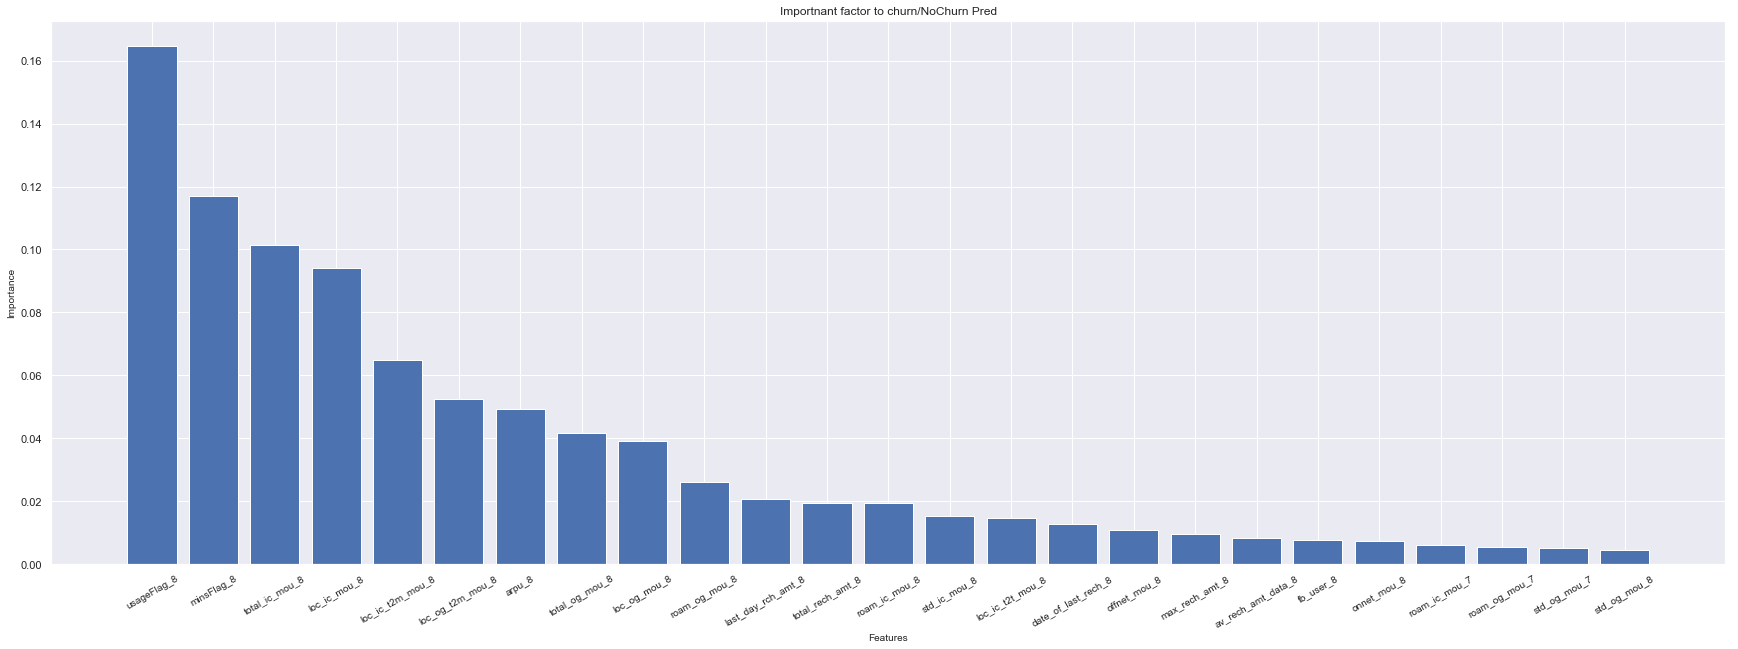

In [250]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
temp = feature_importances
plt.figure(figsize=(30,10))

plot_bar_x(temp.reset_index().head(25))

In [251]:
BestFeature = temp.reset_index().head(25)['index']

In [252]:
BestFeature

0             usageFlag_8
1              minsFlag_8
2          total_ic_mou_8
3            loc_ic_mou_8
4        loc_ic_t2m_mou_8
5        loc_og_t2m_mou_8
6                  arpu_8
7          total_og_mou_8
8            loc_og_mou_8
9           roam_og_mou_8
10     last_day_rch_amt_8
11       total_rech_amt_8
12          roam_ic_mou_8
13           std_ic_mou_8
14       loc_ic_t2t_mou_8
15    date_of_last_rech_8
16           offnet_mou_8
17         max_rech_amt_8
18     av_rech_amt_data_8
19              fb_user_8
20            onnet_mou_8
21          roam_ic_mou_7
22          roam_og_mou_7
23           std_og_mou_7
24           std_og_mou_8
Name: index, dtype: object

# GridSearch CV with PCA Component
We apply cross validation to PCA component in the final model to hypertune the parameter number of principal component required

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,4,8],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(100, 300, 100),
    'n_estimators': range(50, 250, 50), 
    'max_features': [10, 25, 45]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

## Optimal Model with PCA 

In [253]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(min_samples_leaf= 50, max_features= 45, max_depth= 8, n_estimators= 200, min_samples_split= 50)

In [254]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=45, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [255]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [256]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8179
          1       0.76      0.24      0.36       815

avg / total       0.91      0.92      0.91      8994



In [257]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8117   62]
 [ 621  194]]


In [258]:
# Printing confusion matrix
print(accuracy_score(y_test,predictions))

0.9240604847676228


In [259]:
# Making predictions
pred_probs_test = rfc.predict_proba(df_test_pca)

In [260]:
y_pred_final = probability_df(pred_probs_test,y_test)

array([[8117,   62],
       [ 621,  194]], dtype=int64)

In [261]:
model_eval(y_pred_final)

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.012958,0,1,0,0,0,0,0,0,0,0,0
1,0,0.009001,0,1,0,0,0,0,0,0,0,0,0
2,0,0.014183,0,1,0,0,0,0,0,0,0,0,0
3,0,0.073685,0,1,0,0,0,0,0,0,0,0,0
4,0,0.139540,0,1,1,0,0,0,0,0,0,0,0


In [262]:
cutoff_df = prob_cutoff(y_pred_final)

     probablity  accuracy  sensitivity  specificity
0.0         0.0  0.090616     0.000000     1.000000
0.1         0.1  0.838003     0.843746     0.780368
0.2         0.2  0.908606     0.937523     0.618405
0.3         0.3  0.923616     0.971390     0.444172
0.4         0.4  0.925728     0.985940     0.321472
0.5         0.5  0.924060     0.992420     0.238037
0.6         0.6  0.920836     0.995354     0.173006
0.7         0.7  0.914721     0.997677     0.082209
0.8         0.8  0.910496     0.999755     0.014724
0.9         0.9  0.909384     1.000000     0.000000


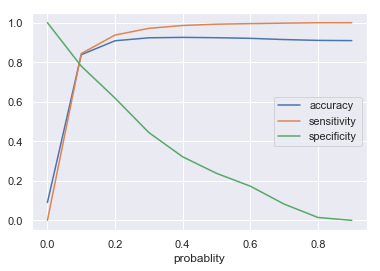

In [263]:
cutoff_df.plot.line(x='probablity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [264]:
final_model(y_pred_final)

array([[6901, 1278],
       [ 179,  636]], dtype=int64)

0.8380031131865688

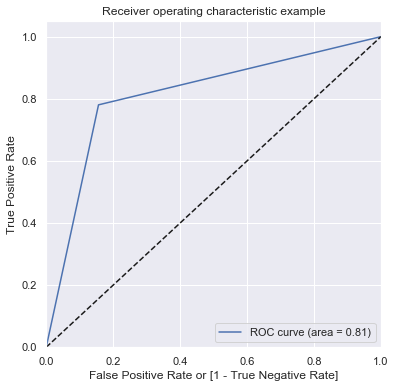

(array([0.        , 0.15625382, 1.        ]),
 array([0.       , 0.7803681, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [265]:
draw_roc(y_pred_final.Churn, y_pred_final.final_predicted)

# Features Importance

In [266]:
df_train_pca

array([[-13.83405914,   1.36109637,   2.47416608, ...,  -0.93062142,
         -0.4474839 ,   0.25564805],
       [ 15.04000451, -10.15725538,  -6.78005674, ...,  -0.20731821,
         -0.17022873,  -0.0466213 ],
       [ 21.12797102,   6.8243049 ,  -6.22232201, ...,   0.33613458,
          1.01504027,   0.46475853],
       ...,
       [ -1.48341452,  -9.10326736, -10.03665692, ...,   0.52354093,
          0.55184051,   0.28933018],
       [ 16.61890188,  -6.92881274,  -3.94005607, ...,   0.30743527,
          0.37165738,   0.05994257],
       [-13.90046855,  -2.33211256,  -0.88326944, ...,   0.44980886,
          0.21256847,   0.1489603 ]])

# As per PCA-2, 21 Best Feature with 0.90 Variance

In [267]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC39':pca.components_[39], 'Feature':colnames}).sort_values('PC39',ascending=False)
pcs_df.shape

(168, 2)

In [268]:
pcs_df.head(21)

,Feature,PC39
82,spl_ic_mou_7,0.809676
24,loc_og_t2c_mou_6,0.238589
153,aon,0.141348
45,spl_og_mou_6,0.101826
102,last_day_rch_amt_6,0.098497
96,max_rech_amt_6,0.075621
11,roam_ic_mou_8,0.062315
143,sachet_2g_8,0.054012
116,count_rech_2g_8,0.053894
145,monthly_3g_7,0.052464


## PCA Best Feature

In [269]:
PCA_Best_Feature = pcs_df.head(21)['Feature']

In [270]:
PCA_Best_Feature

82           spl_ic_mou_7
24       loc_og_t2c_mou_6
153                   aon
45           spl_og_mou_6
102    last_day_rch_amt_6
96         max_rech_amt_6
11          roam_ic_mou_8
143           sachet_2g_8
116       count_rech_2g_8
145          monthly_3g_7
130             arpu_3g_7
92       total_rech_num_8
118       count_rech_3g_7
133             arpu_2g_7
110     total_rech_data_8
127           vol_3g_mb_7
155            jul_vbc_3g
90       total_rech_num_6
91       total_rech_num_7
10          roam_ic_mou_7
35       std_og_t2m_mou_8
Name: Feature, dtype: object

# Model with Best Featues

## HyperParameter Tuning

In [271]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,4,8],
    'min_samples_leaf': range(50, 250, 50),
    'min_samples_split': range(50, 250, 50),
    'n_estimators': range(50, 250, 50), 
    
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,    
                          cv = 5, n_jobs = -1,verbose = 1)

In [272]:
X_train[BestFeature].shape

(20985, 25)

In [273]:
# fit
grid_search.fit(X_train[BestFeature],y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  9.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': range(50, 250, 50), 'n_estimators': range(50, 250, 50), 'max_depth': [2, 4, 8], 'min_samples_leaf': range(50, 250, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [274]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9426256850131046 using {'min_samples_split': 150, 'n_estimators': 200, 'max_depth': 4, 'min_samples_leaf': 50}


# Optimal RandomForest Model with Best Features

In [275]:
# Running the random forest with default parameters.
rfc_F = RandomForestClassifier(min_samples_split= 50, n_estimators= 50,max_depth= 2, min_samples_leaf= 100)

In [276]:
# fit
rfc_F.fit(X_train[BestFeature],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [277]:
# Making predictions
predictions = rfc_F.predict(X_test[BestFeature])

In [278]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96      8179
          1       0.84      0.33      0.48       815

avg / total       0.93      0.93      0.92      8994



In [279]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8127   52]
 [ 543  272]]


In [280]:
# Printing confusion matrix
print(accuracy_score(y_test,predictions))

0.9338447854124973


In [281]:
# Making predictions
pred_probs_test = rfc_F.predict_proba(X_test[BestFeature])

In [282]:
y_pred_final = probability_df(pred_probs_test,y_test)

array([[8127,   52],
       [ 543,  272]], dtype=int64)

In [283]:
model_eval(y_pred_final)

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.028124,0,1,0,0,0,0,0,0,0,0,0
1,0,0.028124,0,1,0,0,0,0,0,0,0,0,0
2,0,0.040540,0,1,0,0,0,0,0,0,0,0,0
3,0,0.039544,0,1,0,0,0,0,0,0,0,0,0
4,0,0.100999,0,1,1,0,0,0,0,0,0,0,0


In [284]:
cutoff_df = prob_cutoff(y_pred_final)

     probablity  accuracy  sensitivity  specificity
0.0         0.0  0.090616     0.000000     1.000000
0.1         0.1  0.918946     0.951828     0.588957
0.2         0.2  0.928174     0.967600     0.532515
0.3         0.3  0.936402     0.981049     0.488344
0.4         0.4  0.936847     0.982516     0.478528
0.5         0.5  0.933845     0.993642     0.333742
0.6         0.6  0.909384     1.000000     0.000000
0.7         0.7  0.909384     1.000000     0.000000
0.8         0.8  0.909384     1.000000     0.000000
0.9         0.9  0.909384     1.000000     0.000000


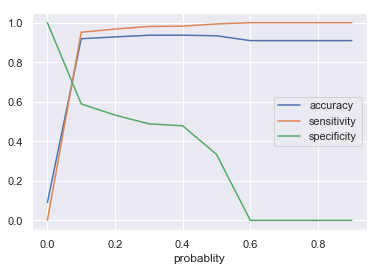

In [285]:
cutoff_df.plot.line(x='probablity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [286]:
final_model_thresh(y_pred_final, 0.09)

array([[7707,  472],
       [ 300,  515]], dtype=int64)

0.9141649988881476

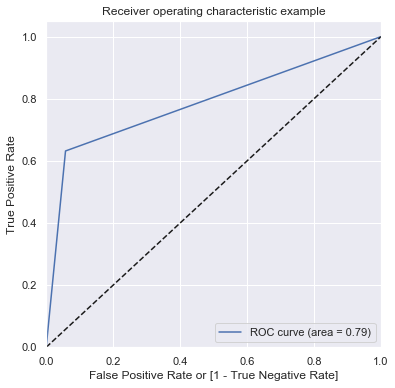

(array([0.        , 0.05770877, 1.        ]),
 array([0.        , 0.63190184, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [287]:
draw_roc(y_pred_final.Churn, y_pred_final.final_predicted)

## Features Importance 

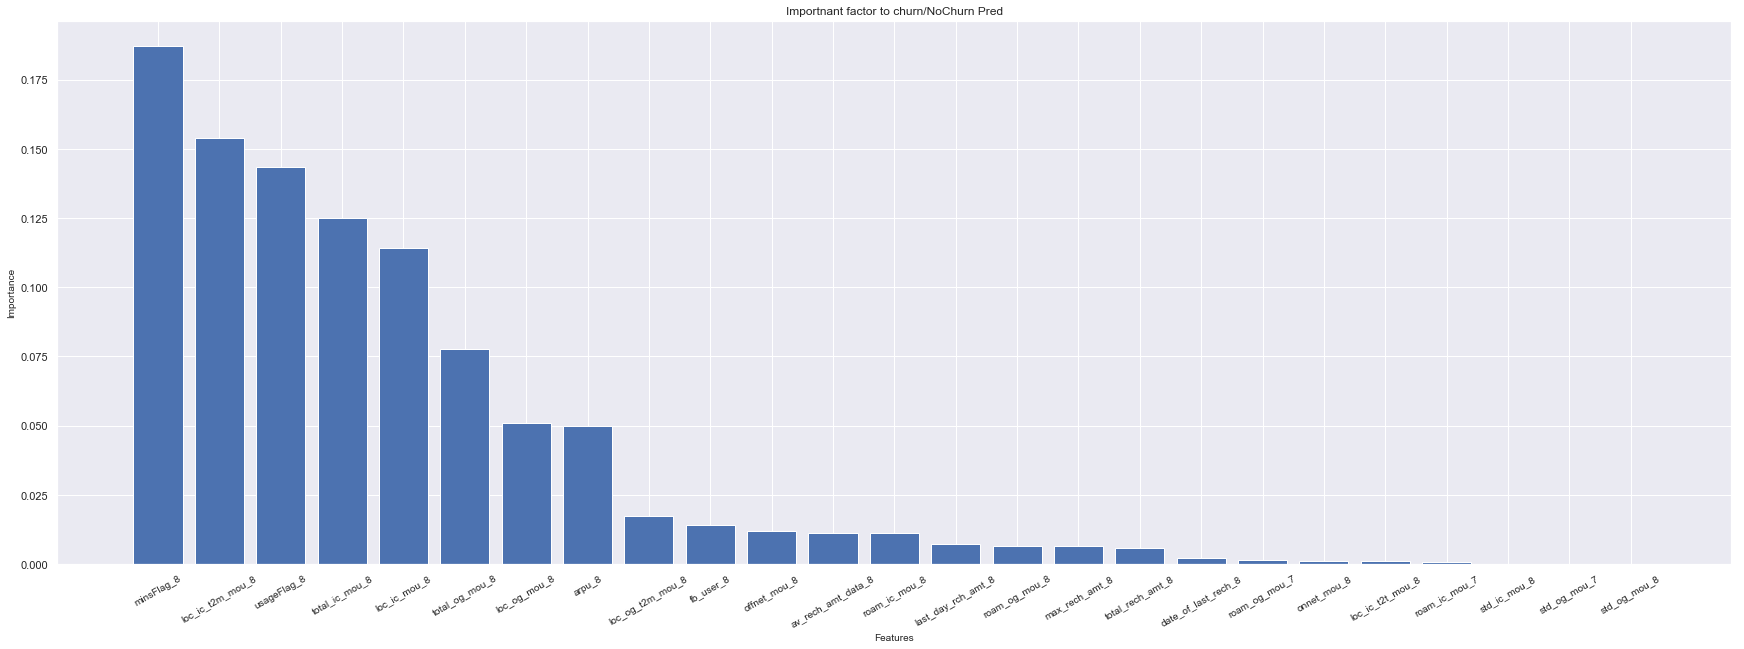

In [288]:
feature_importances = pd.DataFrame(rfc_F.feature_importances_,
                                   index = X_train[BestFeature].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
temp = feature_importances
plt.figure(figsize=(30,10))

plot_bar_x(temp.reset_index().head(25))

# Final Best Model 
## The below figure tells the importance of each and every feature it quantify each and every feature importance Example 'total_ic_mou_8', 'ioc_ic_mou_8 are two topmost important feature

In [289]:
# Running the random forest with default parameters.
rfc_final = RandomForestClassifier(min_samples_split= 100, n_estimators= 100, max_features= 30, max_depth= 10, min_samples_leaf= 100)

In [290]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [291]:
# Making predictions
predictions = rfc_final.predict(X_test)

In [292]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97      8179
          1       0.78      0.42      0.54       815

avg / total       0.93      0.94      0.93      8994



In [293]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8085   94]
 [ 476  339]]


In [294]:
# Printing confusion matrix
print(accuracy_score(y_test,predictions))

0.9366244162775184


In [295]:
# Making predictions
pred_probs_test = rfc_final.predict_proba(X_test)

In [296]:
y_pred_final = probability_df(pred_probs_test,y_test)

array([[8085,   94],
       [ 476,  339]], dtype=int64)

In [297]:
model_eval(y_pred_final)

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006060,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002828,0,1,0,0,0,0,0,0,0,0,0
2,0,0.025808,0,1,0,0,0,0,0,0,0,0,0
3,0,0.024711,0,1,0,0,0,0,0,0,0,0,0
4,0,0.111137,0,1,1,0,0,0,0,0,0,0,0


# Suitable limit of probability
#### Most suitable limit for probability is 0.1 as at this probability accuracy, sensitivity and specificity all are around 0.86 as shown in the graph too.

In [298]:
cutoff_df = prob_cutoff(y_pred_final)

     probablity  accuracy  sensitivity  specificity
0.0         0.0  0.090616     0.000000     1.000000
0.1         0.1  0.863020     0.864409     0.849080
0.2         0.2  0.928508     0.954518     0.667485
0.3         0.3  0.937292     0.976403     0.544785
0.4         0.4  0.937069     0.982638     0.479755
0.5         0.5  0.936624     0.988507     0.415951
0.6         0.6  0.925506     0.997677     0.201227
0.7         0.7  0.909384     1.000000     0.000000
0.8         0.8  0.909384     1.000000     0.000000
0.9         0.9  0.909384     1.000000     0.000000


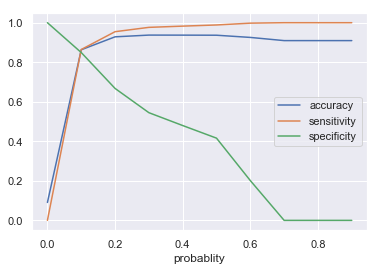

In [299]:
cutoff_df.plot.line(x='probablity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [300]:
final_model(y_pred_final)

array([[7070, 1109],
       [ 123,  692]], dtype=int64)

0.863019790971759

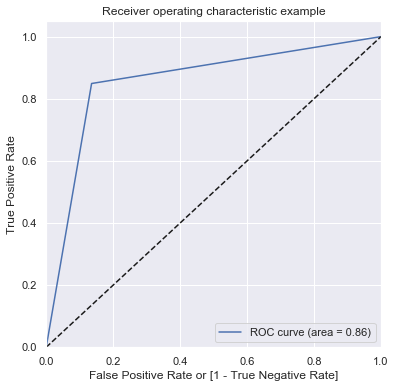

(array([0.        , 0.13559115, 1.        ]),
 array([0.        , 0.84907975, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [301]:
draw_roc(y_pred_final.Churn, y_pred_final.final_predicted)

# Features Importance

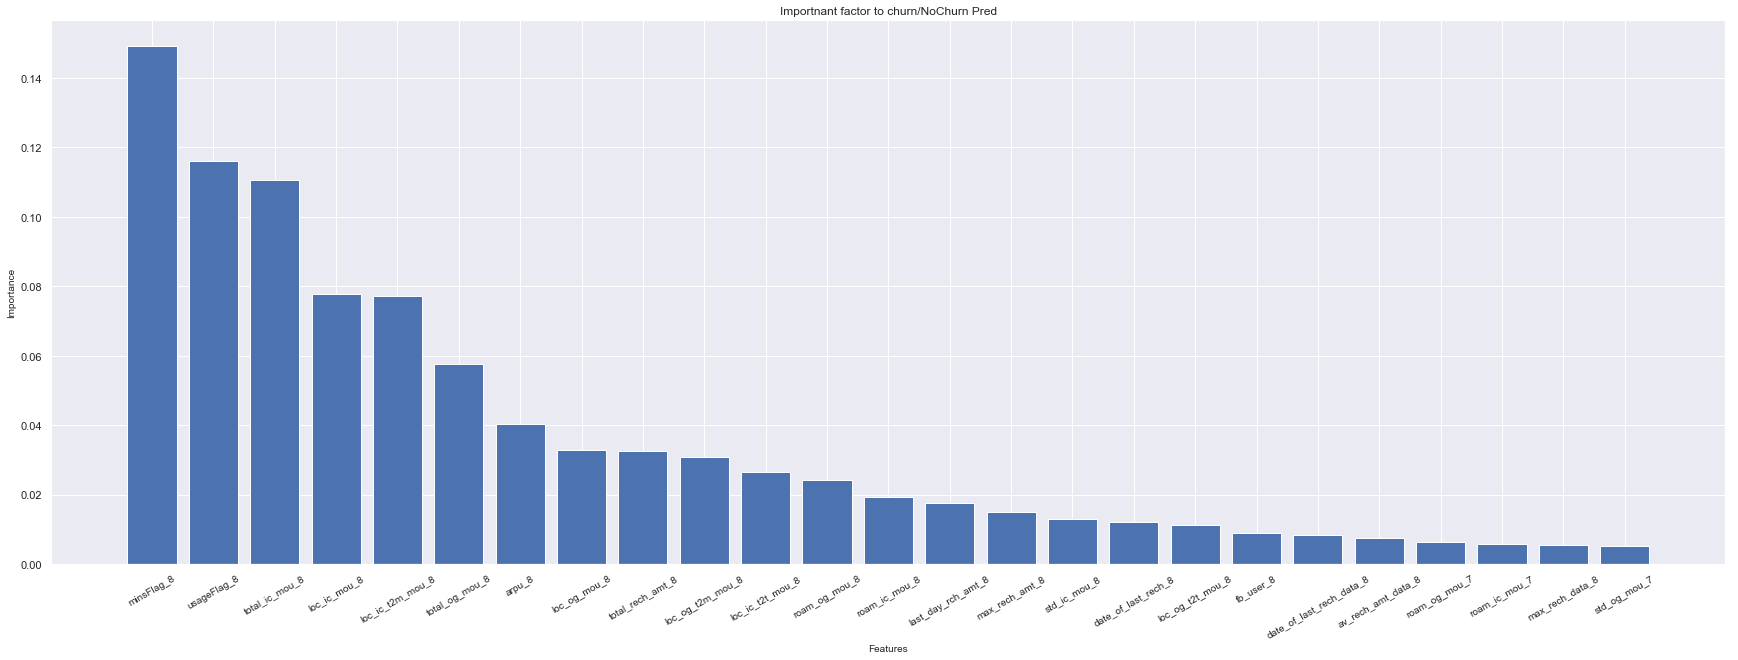

In [302]:
feature_importances = pd.DataFrame(rfc_final.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
temp = feature_importances
plt.figure(figsize=(30,10))

plot_bar_x(temp.reset_index().head(25))

## Accuracy of our final model is 0.86 and  specificity 0.849 is  which in together is better then all our previous models. So this is best suitable model for this problem.